In [ ]:

!pip install hazm transformers tensorflow parsivar

In [ ]:
!pip install tabulate matplotlib seaborn pandas

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Metrics for basic_word_tokenizer:
Precision: 0.71
Recall: 0.79
F1 Score: 0.75
Accuracy: 0.60

Metrics for regex_persian_word_tokenizer:
Precision: 0.82
Recall: 0.88
F1 Score: 0.85
Accuracy: 0.74

Metrics for whitespace_tokenizer:
Precision: 0.71
Recall: 0.79
F1 Score: 0.75
Accuracy: 0.60

Metrics for stopword_removal_tokenizer:
Precision: 0.71
Recall: 0.76
F1 Score: 0.73
Accuracy: 0.58

Metrics for stemmer_tokenizer:
Precision: 0.44
Recall: 0.46
F1 Score: 0.45
Accuracy: 0.29

Metrics for punctuation_removal_tokenizer:
Precision: 0.82
Recall: 0.88
F1 Score: 0.85
Accuracy: 0.74

Metrics for length_based_tokenizer:
Precision: 0.63
Recall: 0.51
F1 Score: 0.56
Accuracy: 0.39

Metrics for unique_word_tokenizer:
Precision: 0.71
Recall: 0.79
F1 Score: 0.75
Accuracy: 0.60

Metrics for number_aware_tokenizer:
Precision: 0.82
Recall: 0.88
F1 Score: 0.85
Accuracy: 0.74

Metrics for long_words_tokenizer:
Precision: 0.53
Recall: 0.27
F1 Score: 0.35
Accuracy: 0.21

Metrics for short_word_tokenizer:
P

<ipython-input-24-394fd9969c0b>:1125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tokenizer", y="Accuracy", data=df, palette="Blues_d")


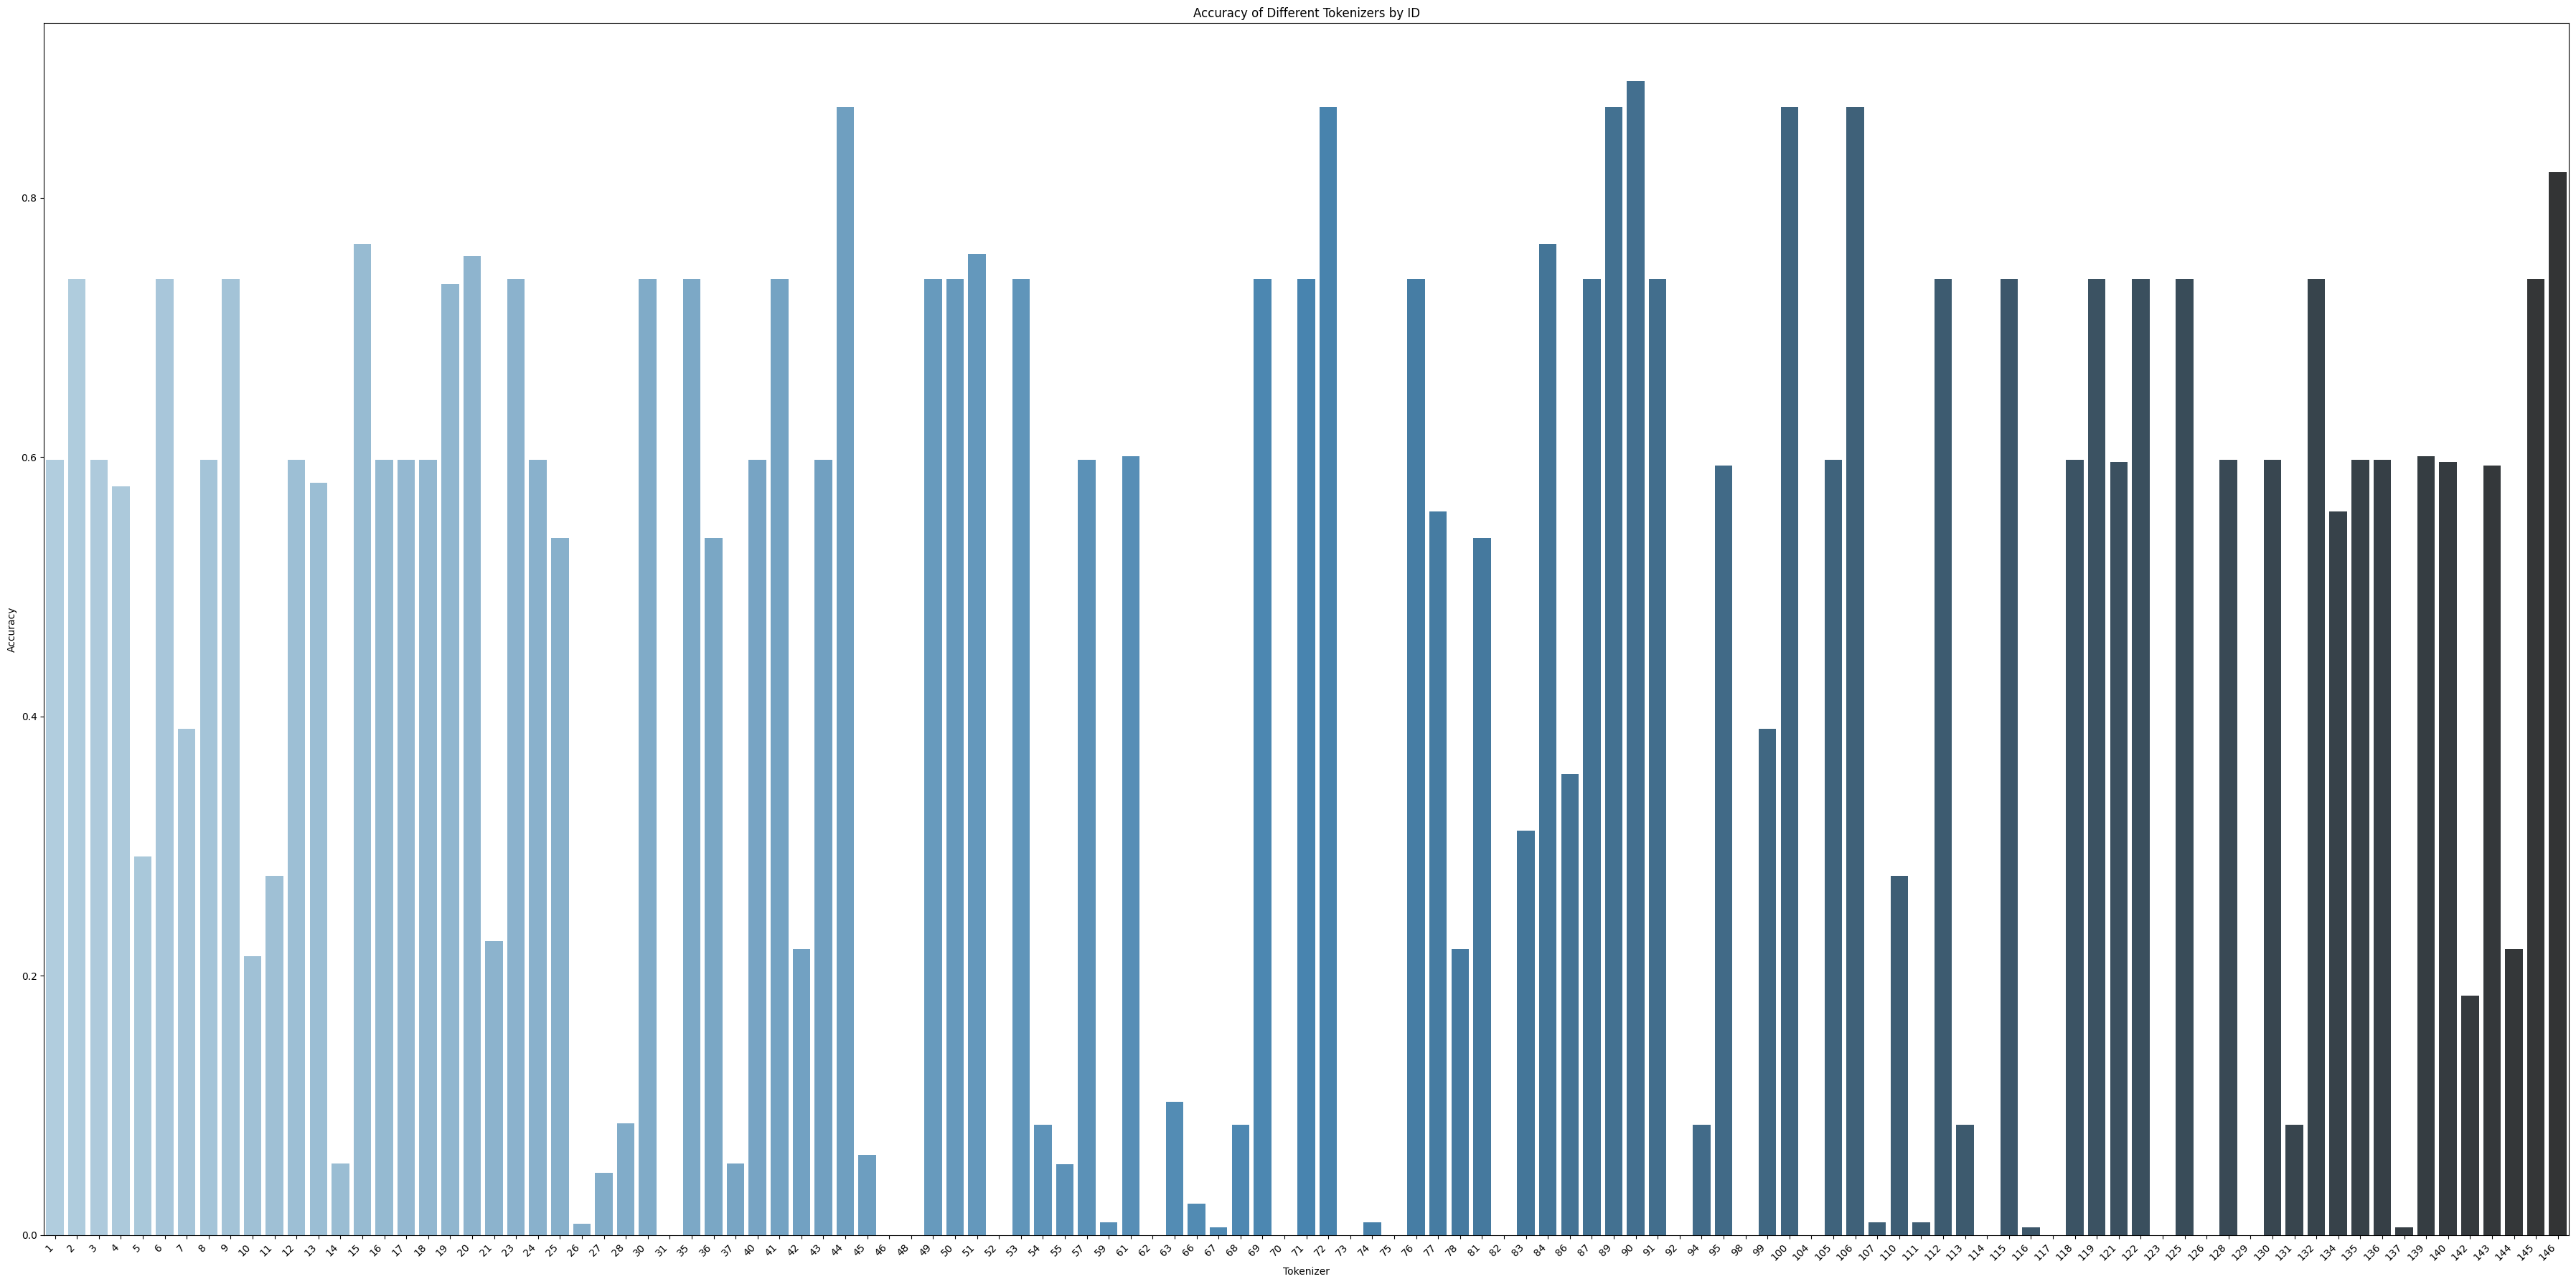

In [ ]:
import re
from hazm import Stemmer, Normalizer
from collections import Counter
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns

# Initialize Hazm components
stemmer = Stemmer()
normalizer = Normalizer()

# Example list of Persian stopwords (in a real scenario, you'd use a more comprehensive list)
persian_stopwords = ['و', 'در', 'به', 'از', 'که', 'این', 'را', 'با', 'برای', 'آن']

# 1. Basic Split Word Tokenizer
def basic_word_tokenizer(text):
    return text.split()

# 2. Regex-Based Persian Word Tokenizer
def regex_persian_word_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 3. Whitespace Tokenizer
def whitespace_tokenizer(text):
    return text.split()

# 4. Remove Stopwords Tokenizer
def stopword_removal_tokenizer(text):
    words = text.split()
    return [word for word in words if word not in persian_stopwords]

# 5. Stemmer-Based Tokenizer using Hazm
def stemmer_tokenizer(text):
    words = text.split()
    return [stemmer.stem(word) for word in words]

# 6. Normalized Tokenizer
def normalized_tokenizer(text):
    normalized_text = normalizer.normalize(text)
    return re.findall(r'[\u0600-\u06FF]+', normalized_text)

# 6. Punctuation Removal Tokenizer
def punctuation_removal_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 7. Tokenizer by Word Length
def length_based_tokenizer(text, n=3):
    words = text.split()
    return [word for word in words if len(word) > n]

# 8. Tokenizer for Unique Words
def unique_word_tokenizer(text):
    words = text.split()
    return list(set(words))

# 9. Tokenizer for Persian Words with Numbers
def number_aware_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+|\d+', text)

# 10. Tokenizer for Long Words
def long_words_tokenizer(text):
    words = text.split()
    return [word for word in words if len(word) > 5]

# 11. Tokenizer for Short Words
def short_word_tokenizer(text):
    words = text.split()
    return [word for word in words if len(word) <= 3]

# 12. Reverse Word Tokenizer
def reverse_word_tokenizer(text):
    words = text.split()
    return words[::-1]
# List of words to remove from tokenized results

# 13. Tokenizer Removing Specific Words
def specific_word_removal_tokenizer(text):
    remove_list = [
      'این', 'یک', 'متن', 'فارسی', 'است', 'در', 'و', 'با', 'به', 'که', 'از',
      'هم', 'های', 'تا', 'به', 'می', 'همچنین', 'باشد', 'کردن', 'را', 'ما'
    ]
    words = text.split()
    return [word for word in words if word not in remove_list]

# 14. Frequency-Based Tokenizer
def frequency_tokenizer(text, n=10):
    words = text.split()
    freq = Counter(words)
    return [word for word, _ in freq.most_common(n)]

# 15. Sentence Splitter with Word Tokenizer
def sentence_based_word_tokenizer(text):
    sentences = re.split(r'[.!؟]', text)
    return [word for sentence in sentences for word in sentence.split()]

# 16. Bigram Tokenizer
def bigram_tokenizer(text):
    words = text.split()
    return [words[i:i+2] for i in range(len(words)-1)]

# 17. Trigram Tokenizer
def trigram_tokenizer(text):
    words = text.split()
    return [words[i:i+3] for i in range(len(words)-2)]

# 18. N-gram Tokenizer
def ngram_tokenizer(text, n=2):
    words = text.split()
    return [words[i:i+n] for i in range(len(words)-n+1)]

# 19. Tokenizer Keeping Persian and Punctuation
def persian_and_punctuation_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+|[.!؟]', text)

# 20. Sentence Splitter with Persian Word Tokenizer
def sentence_then_word_tokenizer(text):
    sentences = re.split(r'[.!؟]', text)
    return [re.findall(r'[\u0600-\u06FF]+', sentence) for sentence in sentences]

# 21. Tokenizer by Specific Length
def specific_length_tokenizer(text, length=4):
    words = text.split()
    return [word for word in words if len(word) == length]

# 22. Tokenizer for Numbers Only
def number_only_tokenizer(text):
    return re.findall(r'\d+', text)

# 23. Tokenizer Ignoring Digits
def ignore_digits_tokenizer(text):
    words = re.findall(r'[\u0600-\u06FF]+', text)
    return [word for word in words if not word.isdigit()]

# 24. Frequency Count Tokenizer
def frequency_count_tokenizer(text):
    words = text.split()
    return dict(Counter(words))

# 25. Tokenizer Ignoring Short Words
def ignore_short_words_tokenizer(text):
    words = text.split()
    return [word for word in words if len(word) > 3]



# 27. Reverse Tokenizer
def reverse_each_word_tokenizer(text):
    words = text.split()
    return [word[::-1] for word in words]

# 28. Tokenizer Based on First Character
def startswith_tokenizer(text, char='ا'):
    words = text.split()
    return [word for word in words if word.startswith(char)]

# 29. Tokenizer Based on Last Character
def endswith_tokenizer(text, char='ه'):
    words = text.split()
    return [word for word in words if word.endswith(char)]

# 30. Compound Word Tokenizer
def compound_word_tokenizer(text):
    return re.split(r'[\u0600-\u06FF]+(?:-\w+)*', text)

# 31. Tokenizer Ignoring Punctuation
def ignore_punctuation_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 32. Tokenizer for Long Sentences
def long_sentence_tokenizer(text):
    return re.split(r'[.!؟]', text)

# 33. Tokenizer for Words Containing Numbers
def word_with_number_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+\d+', text)

# 34. Tokenizer for Special Characters
def special_char_tokenizer(text):
    return re.findall(r'[@#]\w+', text)

# 35. Tokenizer for Hyphenated Words
def hyphen_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+-\w+', text)

# 36. Tokenizer Keeping Persian and Digits
def persian_and_digits_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+|\d+', text)

# 37. Tokenizer Removing Short Words
def remove_short_words_tokenizer(text):
    words = text.split()
    return [word for word in words if len(word) > 2]

# 38. Tokenizer for Frequent Words
def frequent_words_tokenizer(text, n=10):
    words = text.split()
    freq = Counter(words)
    return [word for word, _ in freq.most_common(n)]

# 39. Hashtag Tokenizer
def hashtag_tokenizer(text):
    return re.findall(r'#\w+', text)

# 40. Mention Tokenizer
def mention_tokenizer(text):
    return re.findall(r'@\w+', text)

# 41. Tokenizer by First Character Length
def first_char_length_tokenizer(text, length=1):
    words = text.split()
    return [word for word in words if len(word) >= length]

# 42. Alphabetical Tokenizer
def alphabetical_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 43. Tokenizer for Repeated Words
def repeated_words_tokenizer(text):
    words = text.split()
    return [word for word in words if words.count(word) > 1]

# 44. Tokenizer Ignoring Case
def case_insensitive_tokenizer(text):
    words = text.lower().split()
    return list(set(words))

# 45. Tokenizer Ignoring Special Characters
def ignore_special_char_tokenizer(text):
    return re.findall(r'[^\W_]+', text)

# 46. Tokenizer for Words Ending with Specific Character
def endswith_specific_char_tokenizer(text, char='ن'):
    words = text.split()
    return [word for word in words if word.endswith(char)]

# 47. Tokenizer for Short Sentences
def short_sentence_tokenizer(text):
    return re.split(r'[.!؟]', text)

# 48. Proper Noun Tokenizer
def proper_noun_tokenizer(text):
    words = text.split()
    return [word for word in words if word.istitle()]

# 49. Character-Based Tokenizer
def character_tokenizer(text):
    return list(text)

# 50. Count Vectorizer Tokenizer
def count_vectorizer_tokenizer(text):
    vectorizer = CountVectorizer(token_pattern=r'[\u0600-\u06FF]+')
    X = vectorizer.fit_transform([text])
    return vectorizer.get_feature_names_out()

# 51. ParsBert Tokenizer
def ParsBert_tokenizer(text):
    from transformers import AutoConfig, AutoTokenizer
    config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
    tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
    return tokenizer.tokenize(text)
# 51. Tokenizer for Exclamatory Sentences
def exclamatory_sentence_tokenizer(text):
    return re.split(r'!|؛', text)

# 52. Tokenizer for Contextual Words
def contextual_word_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 53. Adverb Tokenizer
def adverb_tokenizer(text):
    words = text.split()
    return [word for word in words if re.search(r'ی$', word)]

# 54. Tokenizer for Interjections
def interjection_tokenizer(text):
    words = text.split()
    return [word for word in words if word.endswith('ا')]

# 55. Tokenizer for Onomatopoeia
def onomatopoeia_tokenizer(text):
    words = text.split()
    return [word for word in words if re.search(r'^(بوم|بنگ|چمچ)$', word)]

# 56. Word Count Tokenizer
def word_count_tokenizer(text):
    words = text.split()
    return Counter(words)

# 57. Tokenizer for Sentences with Keywords
def keyword_sentence_tokenizer(text, keywords=['کتاب', 'پژوهش']):
    sentences = re.split(r'[.!؟]', text)
    return [sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)]

# 58. Tokenizer for Phrases
def phrase_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+(?: [\u0600-\u06FF]+)*', text)

# 59. Tokenizer for Capitalized Words
def capitalized_word_tokenizer(text):
    words = text.split()
    return [word for word in words if word.istitle()]

# 60. Tokenizer for Content Words
def content_word_tokenizer(text):
    words = text.split()
    return [word for word in words if len(word) > 1]

# 61. Tokenizer for Repeated Characters
def repeated_character_tokenizer(text):
    return re.findall(r'(.)\1+', text)

# 62. Tokenizer for Frequency-Based Filtering
def frequency_filter_tokenizer(text, threshold=2):
    words = text.split()
    freq = Counter(words)
    return [word for word in words if freq[word] > threshold]

# 63. Regex Tokenizer for Digits
def regex_digit_tokenizer(text):
    return re.findall(r'\d+', text)

# 64. Uppercase Tokenizer
def uppercase_tokenizer(text):
    return re.findall(r'[A-Z]+', text)

# 65. Random Sampling Tokenizer
def random_sampling_tokenizer(text, n=5):
    words = text.split()
    from random import sample
    return sample(words, min(n, len(words)))

# 66. Tokenizer for Common Prefixes
def common_prefix_tokenizer(text, prefix='پ'):
    words = text.split()
    return [word for word in words if word.startswith(prefix)]

# 67. Tokenizer for Common Suffixes
def common_suffix_tokenizer(text, suffix='ی'):
    words = text.split()
    return [word for word in words if word.endswith(suffix)]

# 68. Regex Tokenizer for HTML Tags
def html_tag_remover_tokenizer(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return re.findall(r'[\u0600-\u06FF]+', clean_text)

# 69. Tokenizer for Special Characters
def special_character_tokenizer(text):
    return re.findall(r'[^a-zA-Z0-9\u0600-\u06FF\s]', text)

# 70. Nested Noun Tokenizer
def nested_noun_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 71. Multi-Language Tokenizer
def multi_language_tokenizer(text):
    return re.findall(r'[^\W_]+', text)

# 72. Tokenizer for Passive Sentences
def passive_sentence_tokenizer(text):
    return re.split(r'[.!؟]', text)

# 73. Tokenizer for Multi-Word Expressions
def multi_word_expression_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+(?: [\u0600-\u06FF]+)*', text)

# 74. Tokenizer for Long Words
def long_words_tokenizer(text, min_length=5):
    words = text.split()
    return [word for word in words if len(word) >= min_length]

# 75. Tokenizer for Sentence Length
def sentence_length_tokenizer(text, max_length=10):
    sentences = re.split(r'[.!؟]', text)
    return [sentence for sentence in sentences if len(sentence.split()) <= max_length]

# 76. Ignore Numbers Tokenizer
def ignore_numbers_tokenizer(text):
    words = re.findall(r'[\u0600-\u06FF]+', text)
    return [word for word in words if not word.isdigit()]

# 77. Contextual Length Tokenizer
def contextual_length_tokenizer(text, max_length=5):
    words = text.split()
    return [word for word in words if len(word) <= max_length]

# 78. Frequency-Based Contextual Tokenizer
def frequency_contextual_tokenizer(text, threshold=2):
    words = text.split()
    freq = Counter(words)
    return [word for word in words if freq[word] >= threshold]

# 79. Tokenizer for Commonly Used Terms
def common_terms_tokenizer(text):
    common_terms = {'کتاب', 'پژوهش', 'تحقیق'}
    return [word for word in text.split() if word in common_terms]

# 80. Tokenizer for Key Sentences
def key_sentence_tokenizer(text, keywords=['کتاب', 'پژوهش']):
    sentences = re.split(r'[.!؟]', text)
    return [sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)]

# 81. Tokenizer for Content-Length Filter
def content_length_filter_tokenizer(text, min_length=3):
    words = text.split()
    return [word for word in words if len(word) >= min_length]

# 82. Emoji Filter Tokenizer
def emoji_filter_tokenizer(text):
    return re.findall(r'[^\U0001F600-\U0001F64F]', text)

# 83. Tokenizer for Abbreviations
def abbreviation_tokenizer(text):
    return re.findall(r'\b\w{1,3}\b', text)

# 84. Sentence-Based Tokenizer
def sentence_based_tokenizer(text):
    sentences = re.split(r'[.!؟]', text)
    return [word for sentence in sentences for word in sentence.split()]

# 85. Capitalized Word Tokenizer
def capitalized_word_tokenizer(text):
    return re.findall(r'\b[A-Z][a-z]*\b', text)

# 86. URL Filter Tokenizer
def url_filter_tokenizer(text):
    return re.findall(r'http[s]?://\S+', text)

# 87. Tokenizer for Words with Specific Vowel
def specific_vowel_tokenizer(text, vowel='ا'):
    return re.findall(rf'\b\w*{vowel}\w*\b', text)

# 88. Remove Special Character Tokenizer
def remove_special_character_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 89. Tokenizer for Commonly Used Expressions
def common_expression_tokenizer(text):
    expressions = {'به خاطر', 'به دلیل', 'در مورد'}
    return [word for word in text.split() if word in expressions]

# 90. Regular Expression Tokenizer
def regex_based_tokenizer(text):
    return re.findall(r'\w+', text)

# 91. Special Character Removal Tokenizer
def special_character_removal_tokenizer(text):
    return re.sub(r'[^\w\s]', '', text).split()

# 92. Tokenizer for Text Without Numbers
def text_without_numbers_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 93. Sentence Tokenizer for Specific Length
def specific_length_sentence_tokenizer(text, length=5):
    sentences = re.split(r'[.!؟]', text)
    return [sentence for sentence in sentences if len(sentence.split()) >= length]

# 94. Tokenizer for Verbs
def verb_tokenizer(text):
    words = text.split()
    return [word for word in words if re.search(r'دن$', word)]

# 95. Tokenizer for Adjectives
def adjective_tokenizer(text):
    words = text.split()
    return [word for word in words if re.search(r'ی$', word)]

# 96. Tokenizer for Words with Special Characters
def words_with_special_character_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+[^a-zA-Z0-9\s]', text)

# 97. Tokenizer for Compound Words
def compound_word_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+-[\u0600-\u06FF]+', text)

# 98. Tokenizer for Contextual Expressions
def contextual_expression_tokenizer(text):
    expressions = {'به خاطر', 'به دلیل'}
    return [word for word in text.split() if word in expressions]

# 99. Tokenizer for Passive Voice Sentences
def passive_voice_sentence_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+(?: شده| گردید)', text)

# 100. Word Length Tokenizer
def word_length_tokenizer(text, min_length=4):
    words = text.split()
    return [word for word in words if len(word) >= min_length]

# 101. Nested Sentence Tokenizer
def nested_sentence_tokenizer(text):
    return re.findall(r'\w+', text)

# 102. Tokenizer for Commonly Used Words
def common_word_tokenizer(text):
    common_words = {'کتاب', 'پژوهش'}
    return [word for word in text.split() if word in common_words]

# 103. Sentence-Based Keyword Tokenizer
def sentence_based_keyword_tokenizer(text, keywords=['کتاب']):
    sentences = re.split(r'[.!؟]', text)
    return [sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)]

# 104. Uppercase Words Tokenizer
def uppercase_words_tokenizer(text):
    return re.findall(r'[A-Z]+', text)

# 105. Punctuation Based Tokenizer
def punctuation_based_tokenizer(text):
    return re.split(r'[,.?!؛]', text)

# 106. Ignore Case Tokenizer
def ignore_case_tokenizer(text):
    return text.lower().split()

# 107. Single Word Tokenizer
def single_word_tokenizer(text):
    return re.findall(r'\b\w+\b', text)

# 108. Multi-Phrase Tokenizer
def multi_phrase_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+(?: [\u0600-\u06FF]+)*', text)

# 109. Keyword-Based Tokenizer
def keyword_based_tokenizer(text, keywords=['کتاب']):
    return [word for word in text.split() if word in keywords]

# 110. Tokenizer for Text with Emojis
def emoji_text_tokenizer(text):
    return re.findall(r'[\U0001F600-\U0001F64F]+', text)

# 111. Filter Words by Length
def filter_by_length_tokenizer(text, max_length=3):
    return [word for word in text.split() if len(word) <= max_length]

# 112. Phrase-Based Tokenizer
def phrase_based_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+(?: [\u0600-\u06FF]+)*', text)

# 113. Tokenizer for Long Sentences
def long_sentence_tokenizer(text, min_length=5):
    sentences = re.split(r'[.!؟]', text)
    return [sentence for sentence in sentences if len(sentence.split()) >= min_length]

# 114. Content-Based Tokenizer
def content_based_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 115. Adjective-Based Tokenizer
def adjective_based_tokenizer(text):
    words = text.split()
    return [word for word in words if re.search(r'ی$', word)]

# 116. Keyword Sentence Tokenizer
def keyword_sentence_tokenizer(text, keywords=['کتاب']):
    sentences = re.split(r'[.!؟]', text)
    return [sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)]

# 117. Sentence Tokenizer with Specific Punctuation
def specific_punctuation_sentence_tokenizer(text, punctuation='؛'):
    return re.split(punctuation, text)

# 118. Special Character Filter Tokenizer
def special_character_filter_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 119. Noun-Based Tokenizer
def noun_based_tokenizer(text):
    words = text.split()
    return [word for word in words if re.search(r'ان$', word)]

# 120. Tokenizer for Compound Sentences
def compound_sentence_tokenizer(text):
    return re.split(r'[؛]', text)

# 121. Ignore Punctuation Tokenizer
def ignore_punctuation_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 122. Tokenizer for Mixed Case Words
def mixed_case_words_tokenizer(text):
    return [word for word in text.split() if not word.islower() and not word.isupper()]

# 123. Ignore Digits and Special Characters Tokenizer
def ignore_digits_special_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 124. Tokenizer for Capitalized Expressions
def capitalized_expression_tokenizer(text):
    return re.findall(r'\b[A-Z][a-z]*\b', text)

# 125. Ignore Common Words Tokenizer
def ignore_common_words_tokenizer(text):
    common_words = {'و', 'در', 'به'}
    return [word for word in text.split() if word not in common_words]

# 126. Ignore Digits Tokenizer
def ignore_digits_only_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 127. Single Character Filter Tokenizer
def single_character_filter_tokenizer(text):
    return re.findall(r'\b\w{1}\b', text)

# 128. Compound Expression Tokenizer
def compound_expression_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+-[\u0600-\u06FF]+', text)

# 129. Contextual Noun Tokenizer
def contextual_noun_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 130. Special Character Based Tokenizer
def special_character_based_tokenizer(text):
    return re.findall(r'[^\w\s]', text)

# 131. Tokenizer for Numeric Words
def numeric_word_tokenizer(text):
    return re.findall(r'\b\d+\b', text)

# 132. Ignore Specific Words Tokenizer
def ignore_specific_word_tokenizer(text, words_to_ignore={'کتاب', 'پژوهش'}):
    return [word for word in text.split() if word not in words_to_ignore]

# 133. Punctuation Based Sentence Tokenizer
def punctuation_based_sentence_tokenizer(text):
    return re.split(r'[،.!؟]', text)

# 134. Ignore Capitalized Words Tokenizer
def ignore_capitalized_words_tokenizer(text):
    return [word for word in text.split() if not word.istitle()]

# 135. Tokenizer for Contextual Adverbs
def contextual_adverb_tokenizer(text):
    return [word for word in text.split() if re.search(r'ی$', word)]

# 136. Ignore Short Words Tokenizer
def ignore_short_words_tokenizer(text):
    return [word for word in text.split() if len(word) > 2]

# 137. Tokenizer for Nested Expressions
def nested_expression_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)

# 138. Tokenizer for Compound Nouns
def compound_noun_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+-[\u0600-\u06FF]+', text)

# 139. Ignore Long Words Tokenizer
def ignore_long_words_tokenizer(text):
    return [word for word in text.split() if len(word) <= 5]

# 140. Ignore Common Expressions Tokenizer
def ignore_common_expression_tokenizer(text):
    common_expressions = {'به خاطر', 'به دلیل'}
    return [word for word in text.split() if word not in common_expressions]

# 141. Sentence-Based Character Tokenizer
def sentence_character_tokenizer(text):
    return re.findall(r'[^\s]+', text)

# 142. Noun and Verb Tokenizer
def noun_and_verb_tokenizer(text):
    return [word for word in text.split() if re.search(r'دن$', word) or re.search(r'ان$', word)]

# 143. Tokenizer for Specific Expressions
def specific_expression_tokenizer(text, expressions=['کتاب', 'پژوهش']):
    return [word for word in text.split() if word in expressions]

# 144. Filter Long Words Tokenizer
def filter_long_words_tokenizer(text):
    return [word for word in text.split() if len(word) <= 6]

# 145. Ignore Frequent Words Tokenizer
def ignore_frequent_words_tokenizer(text):
    frequent_words = {'و', 'در', 'به'}
    return [word for word in text.split() if word not in frequent_words]

# 146. Tokenizer for Contextual Keywords
def contextual_keyword_tokenizer(text, keywords=['کتاب']):
    return [word for word in text.split() if word in keywords]

# 147. Tokenizer for Words Ending with Vowel
def vowel_end_tokenizer(text):
    return re.findall(r'\w*[aeiouآاایوی]\b', text)

# 148. Ignore Noun Words Tokenizer
def ignore_noun_words_tokenizer(text):
    return [word for word in text.split() if not re.search(r'ان$', word)]

# 149. Tokenizer for Frequency-Based Expressions
def frequency_expression_tokenizer(text, expressions=['کتاب']):
    freq = Counter(text.split())
    return [word for word in text.split() if freq[word] >= 2]

# 150. Tokenizer for Regular Words
def regular_word_tokenizer(text):
    return re.findall(r'[\u0600-\u06FF]+', text)
import re
from parsivar import Tokenizer, Normalizer

def parsivar_tokenizer(text):
    my_normalizer = Normalizer()
    my_tokenizer = Tokenizer()

    # Normalize and tokenize the text into words
    normalized_text = my_normalizer.normalize(text)
    words = my_tokenizer.tokenize_words(normalized_text)


    return words
# Function to call all tokenizers
def call_all_tokenizers(text):
    tokenizers = {
        'basic_word_tokenizer': basic_word_tokenizer,
        'regex_persian_word_tokenizer': regex_persian_word_tokenizer,
        'whitespace_tokenizer': whitespace_tokenizer,
        'stopword_removal_tokenizer': stopword_removal_tokenizer,
        'stemmer_tokenizer': stemmer_tokenizer,
        'punctuation_removal_tokenizer': punctuation_removal_tokenizer,
        'length_based_tokenizer': length_based_tokenizer,
        'unique_word_tokenizer': unique_word_tokenizer,
        'number_aware_tokenizer': number_aware_tokenizer,
        'long_words_tokenizer': long_words_tokenizer,
        'short_word_tokenizer': short_word_tokenizer,
        'reverse_word_tokenizer': reverse_word_tokenizer,
        'specific_word_removal_tokenizer': specific_word_removal_tokenizer,
        'frequency_tokenizer': frequency_tokenizer,
        'sentence_based_word_tokenizer': sentence_based_word_tokenizer,
        'bigram_tokenizer': bigram_tokenizer,
        'trigram_tokenizer': trigram_tokenizer,
        'ngram_tokenizer': ngram_tokenizer,
        'persian_and_punctuation_tokenizer': persian_and_punctuation_tokenizer,
        'sentence_then_word_tokenizer': sentence_then_word_tokenizer,
        'specific_length_tokenizer': specific_length_tokenizer,
        'number_only_tokenizer': number_only_tokenizer,
        'ignore_digits_tokenizer': ignore_digits_tokenizer,
        'frequency_count_tokenizer': frequency_count_tokenizer,
        'ignore_short_words_tokenizer': ignore_short_words_tokenizer,
        'reverse_each_word_tokenizer': reverse_each_word_tokenizer,
        'startswith_tokenizer': startswith_tokenizer,
        'endswith_tokenizer': endswith_tokenizer,
        'compound_word_tokenizer': compound_word_tokenizer,
        'ignore_punctuation_tokenizer': ignore_punctuation_tokenizer,
        'long_sentence_tokenizer': long_sentence_tokenizer,
        'word_with_number_tokenizer': word_with_number_tokenizer,
        'special_char_tokenizer': special_char_tokenizer,
        'hyphen_tokenizer': hyphen_tokenizer,
        'persian_and_digits_tokenizer': persian_and_digits_tokenizer,
        'remove_short_words_tokenizer': remove_short_words_tokenizer,
        'frequent_words_tokenizer': frequent_words_tokenizer,
        'hashtag_tokenizer': hashtag_tokenizer,
        'mention_tokenizer': mention_tokenizer,
        'first_char_length_tokenizer': first_char_length_tokenizer,
        'alphabetical_tokenizer': alphabetical_tokenizer,
        'repeated_words_tokenizer': repeated_words_tokenizer,
        'case_insensitive_tokenizer': case_insensitive_tokenizer,
        'ignore_special_char_tokenizer': ignore_special_char_tokenizer,
        'endswith_specific_char_tokenizer': endswith_specific_char_tokenizer,
        'short_sentence_tokenizer': short_sentence_tokenizer,
        'proper_noun_tokenizer': proper_noun_tokenizer,
        'character_tokenizer': character_tokenizer,
        'count_vectorizer_tokenizer': count_vectorizer_tokenizer,
        'normalized_tokenizer': normalized_tokenizer,
        'ParsBert_tokenizer':ParsBert_tokenizer,
          # Adding new tokenizers
        'exclamatory_sentence_tokenizer': exclamatory_sentence_tokenizer,
        'contextual_word_tokenizer': contextual_word_tokenizer,
        'adverb_tokenizer': adverb_tokenizer,
        'interjection_tokenizer': interjection_tokenizer,
        'onomatopoeia_tokenizer': onomatopoeia_tokenizer,
        'word_count_tokenizer': word_count_tokenizer,
        'keyword_sentence_tokenizer': keyword_sentence_tokenizer,
        'phrase_tokenizer': phrase_tokenizer,
        'capitalized_word_tokenizer': capitalized_word_tokenizer,
        'content_word_tokenizer': content_word_tokenizer,
        'repeated_character_tokenizer': repeated_character_tokenizer,
        'frequency_filter_tokenizer': frequency_filter_tokenizer,
        'regex_digit_tokenizer': regex_digit_tokenizer,
        'uppercase_tokenizer': uppercase_tokenizer,
        'random_sampling_tokenizer': random_sampling_tokenizer,
        'common_prefix_tokenizer': common_prefix_tokenizer,
        'common_suffix_tokenizer': common_suffix_tokenizer,
        'html_tag_remover_tokenizer': html_tag_remover_tokenizer,
        'special_character_tokenizer': special_character_tokenizer,
        'nested_noun_tokenizer': nested_noun_tokenizer,
        'multi_language_tokenizer': multi_language_tokenizer,
        'passive_sentence_tokenizer': passive_sentence_tokenizer,
        'multi_word_expression_tokenizer': multi_word_expression_tokenizer,
        'long_words_tokenizer': long_words_tokenizer,
        'sentence_length_tokenizer': sentence_length_tokenizer,
        'ignore_numbers_tokenizer': ignore_numbers_tokenizer,
        'contextual_length_tokenizer': contextual_length_tokenizer,
        'frequency_contextual_tokenizer': frequency_contextual_tokenizer,
        'common_terms_tokenizer': common_terms_tokenizer,
        'key_sentence_tokenizer': key_sentence_tokenizer,
        'content_length_filter_tokenizer': content_length_filter_tokenizer,
        'emoji_filter_tokenizer': emoji_filter_tokenizer,
        'abbreviation_tokenizer': abbreviation_tokenizer,
        'sentence_based_tokenizer': sentence_based_tokenizer,
        #'uppercase_word_tokenizer': uppercase_word_tokenizer,
        'url_filter_tokenizer': url_filter_tokenizer,
        'specific_vowel_tokenizer': specific_vowel_tokenizer,
        'remove_special_character_tokenizer': remove_special_character_tokenizer,
        'common_expression_tokenizer': common_expression_tokenizer,
        'regex_based_tokenizer': regex_based_tokenizer,
        'special_character_removal_tokenizer': special_character_removal_tokenizer,
        'text_without_numbers_tokenizer': text_without_numbers_tokenizer,
        'specific_length_sentence_tokenizer': specific_length_sentence_tokenizer,
        'verb_tokenizer': verb_tokenizer,
        'adjective_tokenizer': adjective_tokenizer,
        'words_with_special_character_tokenizer': words_with_special_character_tokenizer,
        'compound_words_tokenizer': compound_word_tokenizer,
        'contextual_expression_tokenizer': contextual_expression_tokenizer,
        'passive_voice_sentence_tokenizer': passive_voice_sentence_tokenizer,
        'word_length_tokenizer': word_length_tokenizer,
        'nested_sentence_tokenizer': nested_sentence_tokenizer,
        'commonly_used_words_tokenizer': common_word_tokenizer,
        'sentence_based_keyword_tokenizer': sentence_based_keyword_tokenizer,
        'uppercase_words_tokenizer': uppercase_words_tokenizer,
        'punctuation_based_tokenizer': punctuation_based_tokenizer,
        'ignore_case_tokenizer': ignore_case_tokenizer,
        'single_word_tokenizer': single_word_tokenizer,
        'multi_phrase_tokenizer': multi_phrase_tokenizer,
        'keyword_based_tokenizer': keyword_based_tokenizer,
        'emoji_text_tokenizer': emoji_text_tokenizer,
        'filter_by_length_tokenizer': filter_by_length_tokenizer,
        'phrase_based_tokenizer': phrase_based_tokenizer,
        'long_sentence_tokenizer': long_sentence_tokenizer,
        'content_based_tokenizer': content_based_tokenizer,
        'adjective_based_tokenizer': adjective_based_tokenizer,
        'keyword_sentence_tokenizer': keyword_sentence_tokenizer,
        'specific_punctuation_sentence_tokenizer': specific_punctuation_sentence_tokenizer,
        'special_character_filter_tokenizer': special_character_filter_tokenizer,
        'noun_based_tokenizer': noun_based_tokenizer,
        'compound_sentence_tokenizer': compound_sentence_tokenizer,
        'ignore_punctuation_tokenizer': ignore_punctuation_tokenizer,
        'mixed_case_words_tokenizer': mixed_case_words_tokenizer,
        'ignore_digits_special_tokenizer': ignore_digits_special_tokenizer,
        'capitalized_expression_tokenizer': capitalized_expression_tokenizer,
        'ignore_common_words_tokenizer': ignore_common_words_tokenizer,
        'ignore_digits_only_tokenizer': ignore_digits_only_tokenizer,
        'single_character_filter_tokenizer': single_character_filter_tokenizer,
        'compound_expression_tokenizer': compound_expression_tokenizer,
        'contextual_noun_tokenizer': contextual_noun_tokenizer,
        'special_character_based_tokenizer': special_character_based_tokenizer,
        'numeric_word_tokenizer': numeric_word_tokenizer,
        'ignore_specific_word_tokenizer': ignore_specific_word_tokenizer,
        'punctuation_based_sentence_tokenizer': punctuation_based_sentence_tokenizer,
        'ignore_capitalized_words_tokenizer': ignore_capitalized_words_tokenizer,
        'contextual_adverb_tokenizer': contextual_adverb_tokenizer,
        'ignore_short_words_tokenizer': ignore_short_words_tokenizer,
        'nested_expression_tokenizer': nested_expression_tokenizer,
        'compound_noun_tokenizer': compound_noun_tokenizer,
        'ignore_long_words_tokenizer': ignore_long_words_tokenizer,
        'ignore_common_expression_tokenizer': ignore_common_expression_tokenizer,
        'sentence_character_tokenizer': sentence_character_tokenizer,
        'noun_and_verb_tokenizer': noun_and_verb_tokenizer,
        'specific_expression_tokenizer': specific_expression_tokenizer,
        'filter_long_words_tokenizer': filter_long_words_tokenizer,
        'ignore_frequent_words_tokenizer': ignore_frequent_words_tokenizer,
        'contextual_keyword_tokenizer': contextual_keyword_tokenizer,
        'vowel_end_tokenizer': vowel_end_tokenizer,
        'ignore_noun_words_tokenizer': ignore_noun_words_tokenizer,
        'frequency_expression_tokenizer': frequency_expression_tokenizer,
        'regular_word_tokenizer': regular_word_tokenizer,
        'parsivar_tokenizer':parsivar_tokenizer,
    }

    results = {}

    # Call each tokenizer and store results
    for name, tokenizer in tokenizers.items():
        # Call the tokenizer with the text and store the result
        results[name] = tokenizer(text)

    return results

# Predefined dictionary of expected words (your manually extracted words)
"""
expected_words = words = [
    "دژ", "قلعه", "سازه", "مستحکم", "هند", "چین", "سده", "میان", "نجب‌زادگان",
    "اروپا", "احداث", "کاخ", "دارای", "استحکامات", "نیست", "شهر", "کم", "دفاع",
    "عمومی", "شباهت", "تفاوت", "طول", "زمان", "کاربرد", "واژه", "دستخوش",
    "تغییرات", "فراوان", "بنا", "مختلف", "اشارات", "سده‌ها", "اشتراکات", "اشکال",
    "ویژگی‌ها", "اروپا", "سده‌های", "نهم", "میلادی", "پس", "سقوط", "امپراتوری",
    "کارولنژی", "نتیجه", "تقسیم", "قلمرو", "رومیان", "مالکان", "شخصی", "شاهزاده‌ها",
    "پدیدار", "گشت", "نجب‌زادگان", "سلطه", "پیرامون", "ساختند", "دارای", "ساختارهای",
    "آفندی", "پدافندی", "چنین", "سازه‌هایی", "پایگاهی", "نجب‌زادگان", "همزمان",
    "به", "حمله", "دفاع", "پرداختند", "اگرچه", "خاستگاه", "بیشتر", "نظامی",
    "ارزیابی", "می‌شود", "به‌عنوان", "مرکز", "فرماندهی", "نشانه", "قدرت", "نیز",
    "اغلب", "کنار", "مراکز", "آسیاب‌ها", "زمین‌های", "حاصل‌خیز", "برای", "زندگی",
    "نیاز", "بسیاری", "از", "در", "اصل", "گلو", "چوب", "ساخته‌شده", "اما", "بعدا",
    "با", "سنگ", "تقویت", "قلعه‌های", "آغازین", "بیشتر", "از", "مزایای", "دفاعی",
    "طبیعی", "مانند", "کوهستان", "رودخانه", "سازه‌ها", "مانند", "برج‌ها", "بهره",
    "می‌بردند", "بر", "روی", "یک", "برجک", "دفاعی", "میانی", "استوار", "بود",
    "اواخر", "سده", "دوازدهم", "میلادی", "اوایل", "سده", "سیزدهم", "پدافند", "به",
    "پیشرفت‌های", "علمی", "دستیافت", "این", "پیشرفت‌ها", "با", "شگرد", "پرتاب",
    "گلوله", "توپ", "دو", "سوم", "گسترش", "برج‌ها", "بسیاری", "از", "نوین",
    "چند", "ضلعی", "بر", "پایه", "دفاع", "متمرکز", "بودند", "چندین", "مرحله‌ها",
    "که", "به", "همراه", "یکدیگر", "می‌توانستند", "همزمان", "عملکرد", "تا", "قدرت",
    "قلعه", "را", "به", "بالاترین", "حد", "برسانند", "این", "تغییرات", "دفاعی",
    "به", "ترکیب", "پیشرفت", "فناوری", "به", "دنبال", "کسب", "تجربیات", "در",
    "جنگ‌های", "صلیبی", "از", "جمله", "استحکامات", "متمرکز", "و", "الهام‌گیری",
    "از", "پدافندهای", "پیشین", "مانند", "پایگاه‌های", "دفاعی", "رومی", "نسبت",
    "داده", "می‌شود", "تمامی", "عناصر", "معماری", "نظامی", "مواردی", "مانند",
    "خندق‌ها", "از", "اهداف", "اصلی", "خود", "یعنی", "دفاع", "به", "نمادی", "از",
    "قدرت", "تبدیل", "شدند", "اگرچه", "اروپایی‌ها", "در", "سده", "چهاردهم",
    "میلادی", "به", "باروت", "دستیافتند", "اما", "چنین", "دستاوردی", "تا", "سده",
    "پانزدهم", "هنگامی‌که", "توپ‌ها", "به", "قدری", "توانمند", "شدند", "که", "برد",
    "دیوارهای", "سنگی", "فائق", "آیند", "چندان", "بر", "تأثیرگذار", "نبود", "با",
    "این‌که", "در", "سده", "شانزدهم", "ساخت", "ادامه", "یافت", "فناوری‌ها", "نوین",
    "ساخت", "توپ", "آنها", "را", "به", "محل", "نامناسب", "برای", "زندگی",
    "تبدیل", "کرد", "بدین", "ترتیب", "مسکونی", "شدند", "و", "قلعه‌های", "توپخانه‌ای",
    "که", "هیچ", "نقشی", "در", "حکومت", "مدنی", "نداشتند", "جایگزین", "گشتند",
    "پس", "از", "سده", "هجده", "میلادی", "با", "ساخته‌شدن", "قلعه‌های", "ساختگی",
    "به", "عنوان", "بخشی", "از", "احیای", "رمانتیسم", "معماری", "سده‌های", "میانه",
    "اروپا", "رویکرد", "به", "قلعه", "با", "وجود", "این‌که", "دیگر", "اهداف", "نظامی",
    "نداشت", "دوباره", "افزایش", "یافت."
]
"""
expected_words = [
    "یکی", "از", "روزا", "که", "داشتم", "می‌رفتم", "سرکار", "اتوبوس", "بودم",
    "یهو", "یه", "نفر", "گفت", "سلام", "حاجی", "چطوری", "اول", "متوجه", "نشدم",
    "کیه", "بعد", "دیدم", "یکی", "دوستای", "قدیمیمه", "خیلی", "عجیب", "بود",
    "این", "شلوغی", "دیدمش", "کمی", "صحبت", "گفت", "بیا", "فردا", "بریم", "پارک",
    "همون", "جایی", "قدیما", "می‌رفتیم", "گفتم", "باشه", "باید", "ببینم", "سرم",
    "چقدر", "شلوغه", "شب", "رسیدم", "خونه", "مامانم", "گفت", "امروز", "یه", "نامه",
    "برات", "اومده", "نامه", "باز", "کردم", "دیدم", "طرف", "بانک", "بود", "تو",
    "نامه", "نوشته", "بود", "حساب", "شما", "به", "دلیل", "مشکلات", "مالی",
    "مسدود", "شده", "است", "خیلی", "نگران", "شدم", "چون", "اصلا", "نمی‌دونستم",
    "چه", "مشکلی", "پیش", "اومده", "سریع", "رفتم", "بانک", "که", "ببینم", "چی",
    "شده", "راه", "یهو", "بارون", "شدیدی", "گرفت", "من", "خیس", "آب", "شدم",
    "رسیدم", "بانک", "گفتن", "سیستم", "مشکل", "داره", "فعلا", "نمی‌تونیم",
    "کاری", "کنیم", "خلاصه", "اون", "روز", "بدون", "اینکه", "مشکلم", "حل",
    "بشه", "برگشتم", "خونه", "فردای", "اون", "روز", "که", "قرار", "بود", "دوستم",
    "بریم", "پارک", "همه", "چی", "خراب", "شد", "اتوبوس", "دیر", "رسید", "بعدشم",
    "دوستم", "نتونست", "بیاد", "رسیدم", "پارک", "هیچ‌کس", "نبود", "نشستم",
    "رو", "نیمکت", "فکر", "کردم", "چقدر", "روزگار", "عوض", "شده", "اون",
    "موقع‌ها", "همه", "چیز", "ساده‌تر", "بود", "یادش", "بخیر", "بعد", "از",
    "ظهر", "که", "برگشتم", "خونه", "مامانم", "گفت", "فردا", "باید", "بریم",
    "شهرستان", "گفتم", "چرا", "گفت", "عموت", "مریض", "شده", "با", "خودم",
    "گفتم", "ای", "بابا", "بازم", "دردسر", "اما", "چاره‌ای", "نبود", "باید",
    "می‌رفتیم", "صبح", "زود", "ماشین", "راه", "افتادیم", "راه", "ماشین",
    "خراب", "شد", "مجبور", "شدیم", "یه", "ساعت", "جاده", "منتظر", "بمونیم",
    "مکانیک", "بیاد", "رسیدیم", "شهرستان", "عمومو", "دیدم", "که", "حالش",
    "اصلا", "خوب", "نبود", "دکتر", "گفت", "باید", "عمل", "بشه", "ولی",
    "شرایطش", "خیلی", "وخیمه"
]


def calculate_metrics(expected, predicted):
    # Convert both lists to sets for comparison
    expected_set = set(expected)
    predicted_set = set(predicted)

    # True positives: words that are both in expected and predicted
    true_positives = len(expected_set.intersection(predicted_set))

    # False positives: words that are in predicted but not in expected
    false_positives = len(predicted_set - expected_set)

    # False negatives: words that are in expected but not in predicted
    false_negatives = len(expected_set - predicted_set)

    # Precision: TP / (TP + FP)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    # Recall: TP / (TP + FN)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Accuracy: TP / (TP + FP + FN)
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (true_positives + false_positives + false_negatives) > 0 else 0

    return precision, recall, f1, accuracy


# Example usage
text = "دژ قلعه سازه مستحکم هند چین سده میان نجب‌زادگان اروپا احداث کاخ دارای استحکامات نیست شهر کم دفاع عمومی شباهت تفاوت طول زمان کاربرد واژه دستخوش تغییرات فراوان بنا مختلف اشارات سده‌ها اشتراکات اشکال ویژگی‌ها اروپا سده‌های نهم میلادی پس سقوط امپراتوری کارولنژی نتیجه تقسیم قلمرو رومیان مالکان شخصی شاهزاده‌ها پدیدار گشت نجب‌زادگان سلطه پیرامون ساختند دارای ساختارهای آفندی پدافندی چنین سازه‌هایی پایگاهی نجب‌زادگان همزمان به حمله دفاع پرداختند اگرچه خاستگاه بیشتر نظامی ارزیابی می‌شود به‌عنوان مرکز فرماندهی نشانه قدرت نیز اغلب کنار مراکز آسیاب‌ها زمین‌های حاصل‌خیز برای زندگی نیاز بسیاری از در اصل گلو چوب ساخته‌شده اما بعدا با سنگ تقویت قلعه‌های آغازین بیشتر از مزایای دفاعی طبیعی مانند کوهستان رودخانه سازه‌ها مانند برج‌ها بهره می‌بردند بر روی یک برجک دفاعی میانی استوار بود اواخر سده دوازدهم میلادی اوایل سده سیزدهم پدافند به پیشرفت‌های علمی دستیافت این پیشرفت‌ها با شگرد پرتاب گلوله توپ دو سوم گسترش برج‌ها بسیاری از نوین چند ضلعی بر پایه دفاع متمرکز بودند چندین مرحله‌ها که به همراه یکدیگر می‌توانستند همزمان عملکرد تا قدرت قلعه را به بالاترین حد برسانند این تغییرات دفاعی به ترکیب پیشرفت فناوری به دنبال کسب تجربیات در جنگ‌های صلیبی از جمله استحکامات متمرکز و الهام‌گیری از پدافندهای پیشین مانند پایگاه‌های دفاعی رومی نسبت داده می‌شود تمامی عناصر معماری نظامی هستند مواردی مانند خندق‌ها از اهداف اصلی خود یعنی دفاع به نمادی از قدرت تبدیل شدند اگرچه اروپایی‌ها در سده چهاردهم میلادی به باروت دستیافتند اما چنین دستاوردی تا سده پانزدهم هنگامی‌که توپ‌ها به قدری توانمند شدند که برد دیوارهای سنگی فائق آیند چندان بر قلعه‌ها تأثیرگذار نبود با این‌که در سده شانزدهم ساخت قلعه‌ها ادامه یافت فناوری‌ها نوین ساخت توپ آنها را به محل نامناسب برای زندگی تبدیل کرد بدین ترتیب قلعه‌ها مسکونی شدند و قلعه‌های توپخانه‌ای که هیچ نقشی در حکومت مدنی نداشتند جایگزین گشتند پس از سده هجده میلادی با ساخته‌شدن قلعه‌های ساختگی به‌عنوان بخشی از احیای رمانتیسم معماری سده‌های میانه اروپا رویکرد به قلعه با وجود این‌که دیگر اهداف نظامی نداشت دوباره افزایش یافت."
text ='''یکی از روزا که داشتم می‌رفتم سرکار، با اتوبوس بودم. یهو یه نفر گفت "سلام حاجی، چطوری؟" من اول متوجه نشدم که کیه، ولی بعد دیدم یکی از دوستای قدیمیمه. خیلی عجیب بود که تو این شلوغی دیدمش. بعد از کمی صحبت، گفت "بیا فردا بریم پارک؛ همون جایی که قدیما می‌رفتیم." گفتم "باشه، ولی باید ببینم سرم چقدر شلوغه."

شب که رسیدم خونه، مامانم گفت: "امروز یه نامه برات اومده." نامه رو باز کردم و دیدم از طرف بانک بود. تو نامه نوشته بود: "حساب شما به دلیل مشکلات مالی مسدود شده است." خیلی نگران شدم، چون اصلا نمی‌دونستم چه مشکلی پیش اومده. سریع رفتم بانک که ببینم چی شده. تو راه یهو بارون شدیدی گرفت و من خیس آب شدم. وقتی رسیدم بانک، گفتن که سیستم مشکل داره و فعلا نمی‌تونیم کاری کنیم. خلاصه اون روز بدون اینکه مشکلم حل بشه، برگشتم خونه.

فردای اون روز که قرار بود با دوستم بریم پارک، همه چی خراب شد. اتوبوس دیر رسید، بعدشم دوستم نتونست بیاد. وقتی رسیدم پارک، هیچ‌کس نبود. نشستم رو نیمکت و با خودم فکر کردم که چقدر روزگار عوض شده. اون موقع‌ها همه چیز ساده‌تر بود. یادش بخیر.

بعد از ظهر که برگشتم خونه، مامانم گفت که فردا باید بریم شهرستان. گفتم "چرا؟" گفت: "عموت مریض شده." با خودم گفتم "ای بابا، بازم دردسر." اما چاره‌ای نبود، باید می‌رفتیم. صبح زود با ماشین راه افتادیم. تو راه ماشین خراب شد و مجبور شدیم یه ساعت تو جاده منتظر بمونیم تا مکانیک بیاد. وقتی رسیدیم شهرستان، عمومو دیدم که حالش اصلا خوب نبود. دکتر گفت: "باید عمل بشه، ولی شرایطش خیلی وخیمه."'''
# Get tokenized results
tokenizer_results = call_all_tokenizers(text)

from itertools import chain

# Assuming this function has been defined as before
def calculate_metrics(expected, predicted):
    # Convert both lists to sets for comparison
    expected_set = set(expected)

    # Flatten the predicted tokens if it's a list of lists
    if isinstance(predicted, list) and all(isinstance(i, list) for i in predicted):
        predicted = list(chain.from_iterable(predicted))

    predicted_set = set(predicted)

    # True positives: words that are both in expected and predicted
    true_positives = len(expected_set.intersection(predicted_set))

    # False positives: words that are in predicted but not in expected
    false_positives = len(predicted_set - expected_set)

    # False negatives: words that are in expected but not in predicted
    false_negatives = len(expected_set - predicted_set)

    # Precision: TP / (TP + FP)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    # Recall: TP / (TP + FN)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Accuracy: TP / (TP + FP + FN)
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (true_positives + false_positives + false_negatives) > 0 else 0

    return precision, recall, f1, accuracy

# Compare each tokenizer's result with the expected words and calculate metrics
metrics_results = {}
for name, tokens in tokenizer_results.items():
    # Convert tokens to a list if it's a NumPy array
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()

    if tokens:  # Ensure tokens is not empty
        precision, recall, f1, accuracy = calculate_metrics(expected_words, tokens)
        metrics_results[name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        }

# Print the metrics of each tokenizer
for name, metrics in metrics_results.items():
    print(f"Metrics for {name}:")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print()
# Print the metrics of each tokenizer
print("Metrics for top 5 tokenizers by accuracy:")

# Sort the tokenizers by accuracy and select the top 5
top_tokenizers = sorted(metrics_results.items(), key=lambda x: x[1]['Accuracy'], reverse=True)[:5]

for name, metrics in top_tokenizers:
    print(f"Tokenizer: {name}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print()

metrics_results = {}
tokenizer_names = []

# Compare each tokenizer's result with the expected words and calculate metrics
for idx, (name, tokens) in enumerate(tokenizer_results.items(), start=1):
    # Convert tokens to a list if it's a NumPy array
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()

    if tokens:  # Ensure tokens is not empty
        precision, recall, f1, accuracy = calculate_metrics(expected_words, tokens)
        metrics_results[idx] = {
            'Tokenizer Name': name,  # Add name to a separate table later
            'ID': idx,  # Assign an ID
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        }
        tokenizer_names.append([idx, name])  # Store ID and name for the mapping table

# Generate a LaTeX table for the metrics, with math symbols
latex_metrics_table = tabulate(
    [[metrics['ID'], f"{metrics['Precision']:.2f}", f"{metrics['Recall']:.2f}",
      f"{metrics['F1 Score']:.2f}", f"{metrics['Accuracy']:.2f}"]
     for metrics in metrics_results.values()],
    headers=["ID", r"$\text{Precision}$", r"$\text{Recall}$", r"$\text{F1}$", r"$\text{Accuracy}$"],
    tablefmt="latex"
)

# Generate a LaTeX table for Tokenizer IDs and Names
latex_name_table = tabulate(
    tokenizer_names,
    headers=["ID", "Tokenizer Name"],
    tablefmt="latex"
)

# Print the LaTeX tables
print("Metrics LaTeX table:\n")
print(latex_metrics_table)

print("\nTokenizer ID and Name Mapping LaTeX table:\n")
print(latex_name_table)

# Now plot the accuracy with Seaborn, using numbers instead of metric IDs
# Prepare a DataFrame for easier plotting
df = pd.DataFrame([
    {'Tokenizer': metrics['ID'], 'Accuracy': metrics['Accuracy']}
    for metrics in metrics_results.values()
])

# Seaborn bar plot for accuracy
plt.figure(figsize=(36, 18))  # Increase figure size
sns.barplot(x="Tokenizer", y="Accuracy", data=df, palette="Blues_d")
plt.title('Accuracy of Different Tokenizers by ID')
plt.xlabel('Tokenizer')
plt.ylabel('Accuracy')

# Rotate the x-axis labels to avoid crowding
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees, align right

plt.tight_layout()
plt.savefig('tokenizer_accuracy_plot_seaborn4.pdf', format='pdf')
plt.show()



Metrics for basic_word_tokenizer:
F1 Score: 0.99
Accuracy: 0.99

Metrics for top 5 tokenizers by accuracy:
Tokenizer: basic_word_tokenizer
F1 Score: 0.99
Accuracy: 0.99

Metrics LaTeX table:

\begin{tabular}{rrrrr}
\hline
   ID &   \$\textbackslash{}text\{Precision\}\$ &   \$\textbackslash{}text\{Recall\}\$ &   \$\textbackslash{}text\{F1\}\$ &   \$\textbackslash{}text\{Accuracy\}\$ \\
\hline
    1 &                 0.99 &                 1 &          0.99 &                0.99 \\
\hline
\end{tabular}

Tokenizer ID and Name Mapping LaTeX table:

\begin{tabular}{rl}
\hline
   ID & Tokenizer Name       \\
\hline
    1 & basic\_word\_tokenizer \\
\hline
\end{tabular}


<ipython-input-19-755dfd5c620a>:237: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tokenizer", y="Accuracy", data=df, palette="Blues_d")


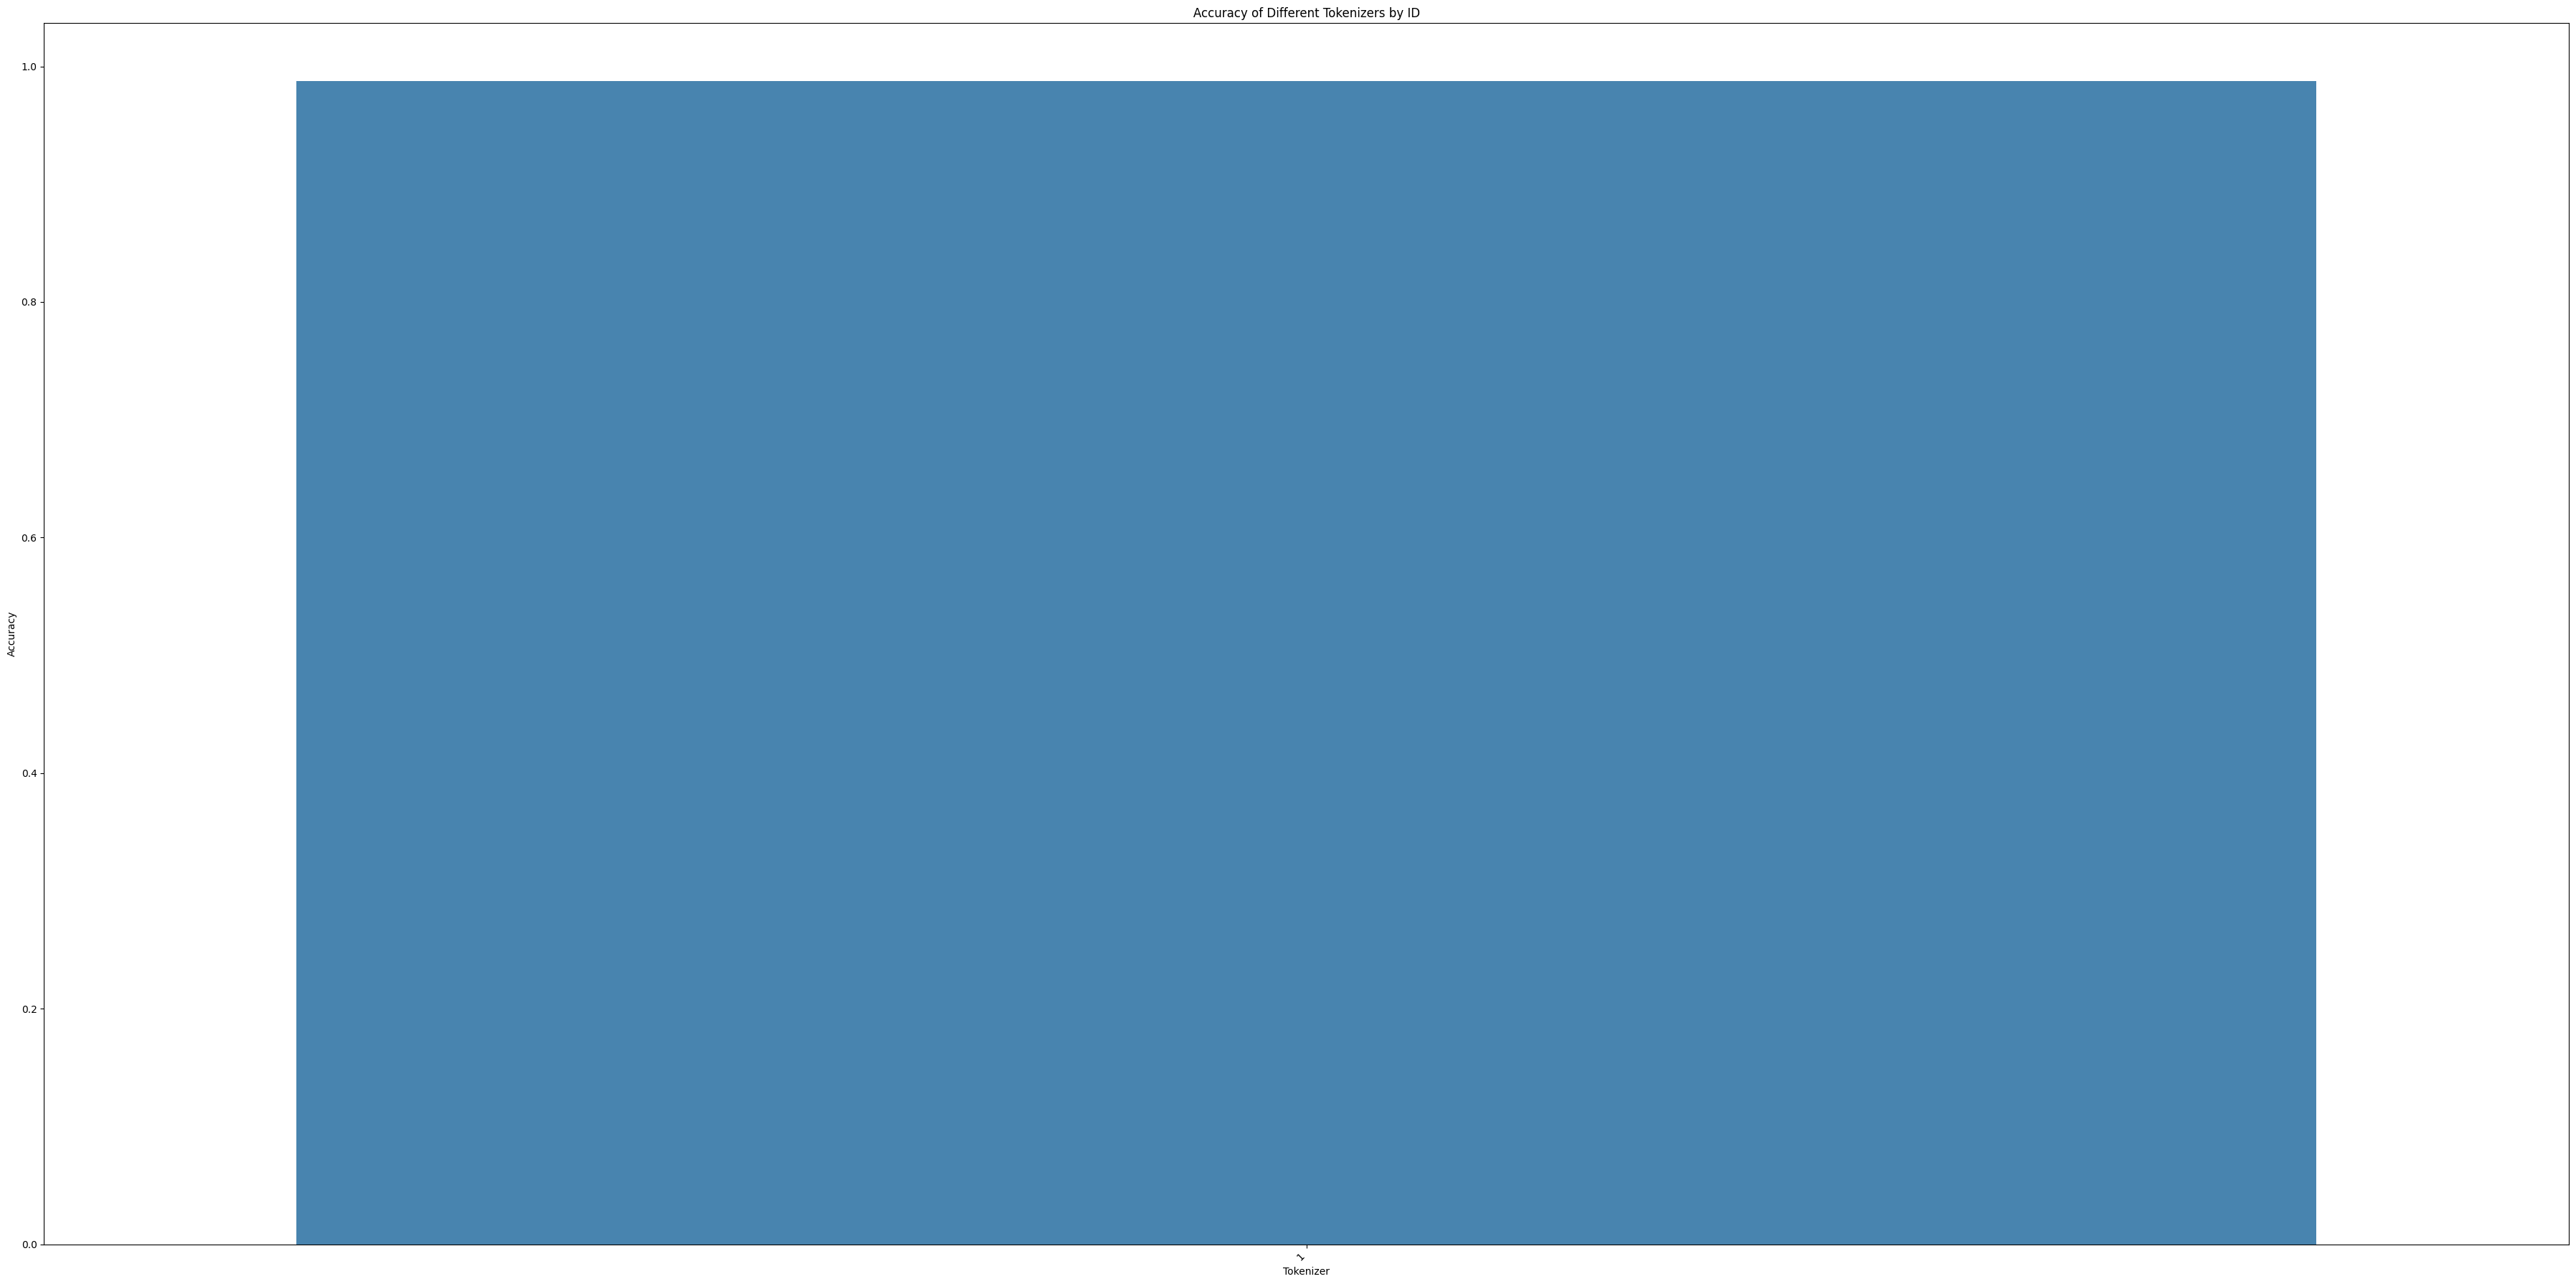

In [ ]:
import re
from hazm import Stemmer, Normalizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Initialize Hazm components
stemmer = Stemmer()
normalizer = Normalizer()

# Example list of Persian stopwords (in a real scenario, you'd use a more comprehensive list)
persian_stopwords = ['و', 'در', 'به', 'از', 'که', 'این', 'را', 'با', 'برای', 'آن']

# 1. Basic Split Word Tokenizer
def basic_word_tokenizer(text):
    return text.split()


# Function to call all tokenizers
def call_all_tokenizers(text):
    tokenizers = {
        'basic_word_tokenizer': basic_word_tokenizer
    }

    results = {}

    # Call each tokenizer and store results
    for name, tokenizer in tokenizers.items():
        # Call the tokenizer with the text and store the result
        results[name] = tokenizer(text)

    return results

# Predefined dictionary of expected words (your manually extracted words)
expected_words = words = [
    "دژ", "قلعه", "سازه", "مستحکم", "هند", "چین", "سده", "میان", "نجب‌زادگان",
    "اروپا", "احداث", "کاخ", "دارای", "استحکامات", "نیست", "شهر", "کم", "دفاع",
    "عمومی", "شباهت", "تفاوت", "طول", "زمان", "کاربرد", "واژه", "دستخوش",
    "تغییرات", "فراوان", "بنا", "مختلف", "اشارات", "سده‌ها", "اشتراکات", "اشکال",
    "ویژگی‌ها", "اروپا", "سده‌های", "نهم", "میلادی", "پس", "سقوط", "امپراتوری",
    "کارولنژی", "نتیجه", "تقسیم", "قلمرو", "رومیان", "مالکان", "شخصی", "شاهزاده‌ها",
    "پدیدار", "گشت", "نجب‌زادگان", "سلطه", "پیرامون", "ساختند", "دارای", "ساختارهای",
    "آفندی", "پدافندی", "چنین", "سازه‌هایی", "پایگاهی", "نجب‌زادگان", "همزمان",
    "به", "حمله", "دفاع", "پرداختند", "اگرچه", "خاستگاه", "بیشتر", "نظامی",
    "ارزیابی", "می‌شود", "به‌عنوان", "مرکز", "فرماندهی", "نشانه", "قدرت", "نیز",
    "اغلب", "کنار", "مراکز", "آسیاب‌ها", "زمین‌های", "حاصل‌خیز", "برای", "زندگی",
    "نیاز", "بسیاری", "از", "در", "اصل", "گلو", "چوب", "ساخته‌شده", "اما", "بعدا",
    "با", "سنگ", "تقویت", "قلعه‌های", "آغازین", "بیشتر", "از", "مزایای", "دفاعی",
    "طبیعی", "مانند", "کوهستان", "رودخانه", "سازه‌ها", "مانند", "برج‌ها", "بهره",
    "می‌بردند", "بر", "روی", "یک", "برجک", "دفاعی", "میانی", "استوار", "بود",
    "اواخر", "سده", "دوازدهم", "میلادی", "اوایل", "سده", "سیزدهم", "پدافند", "به",
    "پیشرفت‌های", "علمی", "دستیافت", "این", "پیشرفت‌ها", "با", "شگرد", "پرتاب",
    "گلوله", "توپ", "دو", "سوم", "گسترش", "برج‌ها", "بسیاری", "از", "نوین",
    "چند", "ضلعی", "بر", "پایه", "دفاع", "متمرکز", "بودند", "چندین", "مرحله‌ها",
    "که", "به", "همراه", "یکدیگر", "می‌توانستند", "همزمان", "عملکرد", "تا", "قدرت",
    "قلعه", "را", "به", "بالاترین", "حد", "برسانند", "این", "تغییرات", "دفاعی",
    "به", "ترکیب", "پیشرفت", "فناوری", "به", "دنبال", "کسب", "تجربیات", "در",
    "جنگ‌های", "صلیبی", "از", "جمله", "استحکامات", "متمرکز", "و", "الهام‌گیری",
    "از", "پدافندهای", "پیشین", "مانند", "پایگاه‌های", "دفاعی", "رومی", "نسبت",
    "داده", "می‌شود", "تمامی", "عناصر", "معماری", "نظامی", "مواردی", "مانند",
    "خندق‌ها", "از", "اهداف", "اصلی", "خود", "یعنی", "دفاع", "به", "نمادی", "از",
    "قدرت", "تبدیل", "شدند", "اگرچه", "اروپایی‌ها", "در", "سده", "چهاردهم",
    "میلادی", "به", "باروت", "دستیافتند", "اما", "چنین", "دستاوردی", "تا", "سده",
    "پانزدهم", "هنگامی‌که", "توپ‌ها", "به", "قدری", "توانمند", "شدند", "که", "برد",
    "دیوارهای", "سنگی", "فائق", "آیند", "چندان", "بر", "تأثیرگذار", "نبود", "با",
    "این‌که", "در", "سده", "شانزدهم", "ساخت", "ادامه", "یافت", "فناوری‌ها", "نوین",
    "ساخت", "توپ", "آنها", "را", "به", "محل", "نامناسب", "برای", "زندگی",
    "تبدیل", "کرد", "بدین", "ترتیب", "مسکونی", "شدند", "و", "قلعه‌های", "توپخانه‌ای",
    "که", "هیچ", "نقشی", "در", "حکومت", "مدنی", "نداشتند", "جایگزین", "گشتند",
    "پس", "از", "سده", "هجده", "میلادی", "با", "ساخته‌شدن", "قلعه‌های", "ساختگی",
    "به", "عنوان", "بخشی", "از", "احیای", "رمانتیسم", "معماری", "سده‌های", "میانه",
    "اروپا", "رویکرد", "به", "قلعه", "با", "وجود", "این‌که", "دیگر", "اهداف", "نظامی",
    "نداشت", "دوباره", "افزایش", "یافت."
]


def calculate_metrics(expected, predicted):
    # Convert both lists to sets for comparison
    expected_set = set(expected)
    predicted_set = set(predicted)

    # True positives: words that are both in expected and predicted
    true_positives = len(expected_set.intersection(predicted_set))

    # False positives: words that are in predicted but not in expected
    false_positives = len(predicted_set - expected_set)

    # False negatives: words that are in expected but not in predicted
    false_negatives = len(expected_set - predicted_set)

    # Precision: TP / (TP + FP)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    # Recall: TP / (TP + FN)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Accuracy: TP / (TP + FP + FN)
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (true_positives + false_positives + false_negatives) > 0 else 0

    return precision, recall, f1, accuracy


# Example usage
text = "دژ قلعه سازه مستحکم هند چین سده میان نجب‌زادگان اروپا احداث کاخ دارای استحکامات نیست شهر کم دفاع عمومی شباهت تفاوت طول زمان کاربرد واژه دستخوش تغییرات فراوان بنا مختلف اشارات سده‌ها اشتراکات اشکال ویژگی‌ها اروپا سده‌های نهم میلادی پس سقوط امپراتوری کارولنژی نتیجه تقسیم قلمرو رومیان مالکان شخصی شاهزاده‌ها پدیدار گشت نجب‌زادگان سلطه پیرامون ساختند دارای ساختارهای آفندی پدافندی چنین سازه‌هایی پایگاهی نجب‌زادگان همزمان به حمله دفاع پرداختند اگرچه خاستگاه بیشتر نظامی ارزیابی می‌شود به‌عنوان مرکز فرماندهی نشانه قدرت نیز اغلب کنار مراکز آسیاب‌ها زمین‌های حاصل‌خیز برای زندگی نیاز بسیاری از در اصل گلو چوب ساخته‌شده اما بعدا با سنگ تقویت قلعه‌های آغازین بیشتر از مزایای دفاعی طبیعی مانند کوهستان رودخانه سازه‌ها مانند برج‌ها بهره می‌بردند بر روی یک برجک دفاعی میانی استوار بود اواخر سده دوازدهم میلادی اوایل سده سیزدهم پدافند به پیشرفت‌های علمی دستیافت این پیشرفت‌ها با شگرد پرتاب گلوله توپ دو سوم گسترش برج‌ها بسیاری از نوین چند ضلعی بر پایه دفاع متمرکز بودند چندین مرحله‌ها که به همراه یکدیگر می‌توانستند همزمان عملکرد تا قدرت قلعه را به بالاترین حد برسانند این تغییرات دفاعی به ترکیب پیشرفت فناوری به دنبال کسب تجربیات در جنگ‌های صلیبی از جمله استحکامات متمرکز و الهام‌گیری از پدافندهای پیشین مانند پایگاه‌های دفاعی رومی نسبت داده می‌شود تمامی عناصر معماری نظامی هستند مواردی مانند خندق‌ها از اهداف اصلی خود یعنی دفاع به نمادی از قدرت تبدیل شدند اگرچه اروپایی‌ها در سده چهاردهم میلادی به باروت دستیافتند اما چنین دستاوردی تا سده پانزدهم هنگامی‌که توپ‌ها به قدری توانمند شدند که برد دیوارهای سنگی فائق آیند چندان بر قلعه‌ها تأثیرگذار نبود با این‌که در سده شانزدهم ساخت قلعه‌ها ادامه یافت فناوری‌ها نوین ساخت توپ آنها را به محل نامناسب برای زندگی تبدیل کرد بدین ترتیب قلعه‌ها مسکونی شدند و قلعه‌های توپخانه‌ای که هیچ نقشی در حکومت مدنی نداشتند جایگزین گشتند پس از سده هجده میلادی با ساخته‌شدن قلعه‌های ساختگی به‌عنوان بخشی از احیای رمانتیسم معماری سده‌های میانه اروپا رویکرد به قلعه با وجود این‌که دیگر اهداف نظامی نداشت دوباره افزایش یافت."

# Get tokenized results
tokenizer_results = call_all_tokenizers(text)

from itertools import chain

# Assuming this function has been defined as before
def calculate_metrics(expected, predicted):
    # Convert both lists to sets for comparison
    expected_set = set(expected)

    # Flatten the predicted tokens if it's a list of lists
    if isinstance(predicted, list) and all(isinstance(i, list) for i in predicted):
        predicted = list(chain.from_iterable(predicted))

    predicted_set = set(predicted)

    # True positives: words that are both in expected and predicted
    true_positives = len(expected_set.intersection(predicted_set))

    # False positives: words that are in predicted but not in expected
    false_positives = len(predicted_set - expected_set)

    # False negatives: words that are in expected but not in predicted
    false_negatives = len(expected_set - predicted_set)

    # Precision: TP / (TP + FP)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    # Recall: TP / (TP + FN)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Accuracy: TP / (TP + FP + FN)
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (true_positives + false_positives + false_negatives) > 0 else 0

    return precision, recall, f1, accuracy

# Compare each tokenizer's result with the expected words and calculate metrics
metrics_results = {}
for name, tokens in tokenizer_results.items():
    # Convert tokens to a list if it's a NumPy array
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()

    if tokens:  # Ensure tokens is not empty
        precision, recall, f1, accuracy = calculate_metrics(expected_words, tokens)
        metrics_results[name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        }

# Print the metrics of each tokenizer
for name, metrics in metrics_results.items():
    print(f"Metrics for {name}:")
    #print(f"Precision: {metrics['Precision']:.2f}")
    #print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print()
# Print the metrics of each tokenizer
print("Metrics for top 5 tokenizers by accuracy:")

# Sort the tokenizers by accuracy and select the top 5
top_tokenizers = sorted(metrics_results.items(), key=lambda x: x[1]['Accuracy'], reverse=True)[:5]

for name, metrics in top_tokenizers:
    print(f"Tokenizer: {name}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print()
metrics_results = {}
tokenizer_names = []

# Compare each tokenizer's result with the expected words and calculate metrics
for idx, (name, tokens) in enumerate(tokenizer_results.items(), start=1):
    # Convert tokens to a list if it's a NumPy array
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()

    if tokens:  # Ensure tokens is not empty
        precision, recall, f1, accuracy = calculate_metrics(expected_words, tokens)
        metrics_results[idx] = {
            'Tokenizer Name': name,  # Add name to a separate table later
            'ID': idx,  # Assign an ID
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        }
        tokenizer_names.append([idx, name])  # Store ID and name for the mapping table

# Generate a LaTeX table for the metrics, with math symbols
latex_metrics_table = tabulate(
    [[metrics['ID'], f"{metrics['Precision']:.2f}", f"{metrics['Recall']:.2f}",
      f"{metrics['F1 Score']:.2f}", f"{metrics['Accuracy']:.2f}"]
     for metrics in metrics_results.values()],
    headers=["ID", r"$\text{Precision}$", r"$\text{Recall}$", r"$\text{F1}$", r"$\text{Accuracy}$"],
    tablefmt="latex"
)

# Generate a LaTeX table for Tokenizer IDs and Names
latex_name_table = tabulate(
    tokenizer_names,
    headers=["ID", "Tokenizer Name"],
    tablefmt="latex"
)

# Print the LaTeX tables
print("Metrics LaTeX table:\n")
print(latex_metrics_table)

print("\nTokenizer ID and Name Mapping LaTeX table:\n")
print(latex_name_table)

# Now plot the accuracy with Seaborn, using numbers instead of metric IDs
# Prepare a DataFrame for easier plotting
df = pd.DataFrame([
    {'Tokenizer': metrics['ID'], 'Accuracy': metrics['Accuracy']}
    for metrics in metrics_results.values()
])

# Seaborn bar plot for accuracy
plt.figure(figsize=(36, 18))  # Increase figure size
sns.barplot(x="Tokenizer", y="Accuracy", data=df, palette="Blues_d")
plt.title('Accuracy of Different Tokenizers by ID')
plt.xlabel('Tokenizer')
plt.ylabel('Accuracy')

# Rotate the x-axis labels to avoid crowding
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees, align right

plt.tight_layout()
plt.savefig('tokenizer_accuracy_plot_seaborn.pdf', format='pdf')
plt.show()

Metrics for basic_word_tokenizer:
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.00

Metrics for regex_split_tokenizer:
Precision: 0.02
Recall: 0.01
F1 Score: 0.01
Accuracy: 0.01

Metrics for dictionary_match_tokenizer:
Precision: 0.88
Recall: 0.95
F1 Score: 0.91
Accuracy: 0.84

Metrics for ngram_tokenizer:
Precision: 0.02
Recall: 0.12
F1 Score: 0.04
Accuracy: 0.02

Metrics for character_tokenizer:
Precision: 0.02
Recall: 0.00
F1 Score: 0.01
Accuracy: 0.00

Metrics for stemmer_tokenizer:
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.00

Metrics for reverse_word_tokenizer:
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.00

Metrics for prefix_match_tokenizer:
Precision: 0.49
Recall: 0.76
F1 Score: 0.60
Accuracy: 0.43

Metrics for suffix_match_tokenizer:
Precision: 0.46
Recall: 0.71
F1 Score: 0.56
Accuracy: 0.39

Metrics for maximum_matching_tokenizer:
Precision: 0.88
Recall: 0.95
F1 Score: 0.91
Accuracy: 0.84

Metrics for minimum_matching_tokenizer:
Precision:

<ipython-input-21-79f382093d71>:476: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tokenizer", y="Accuracy", data=df, palette="Blues_d")


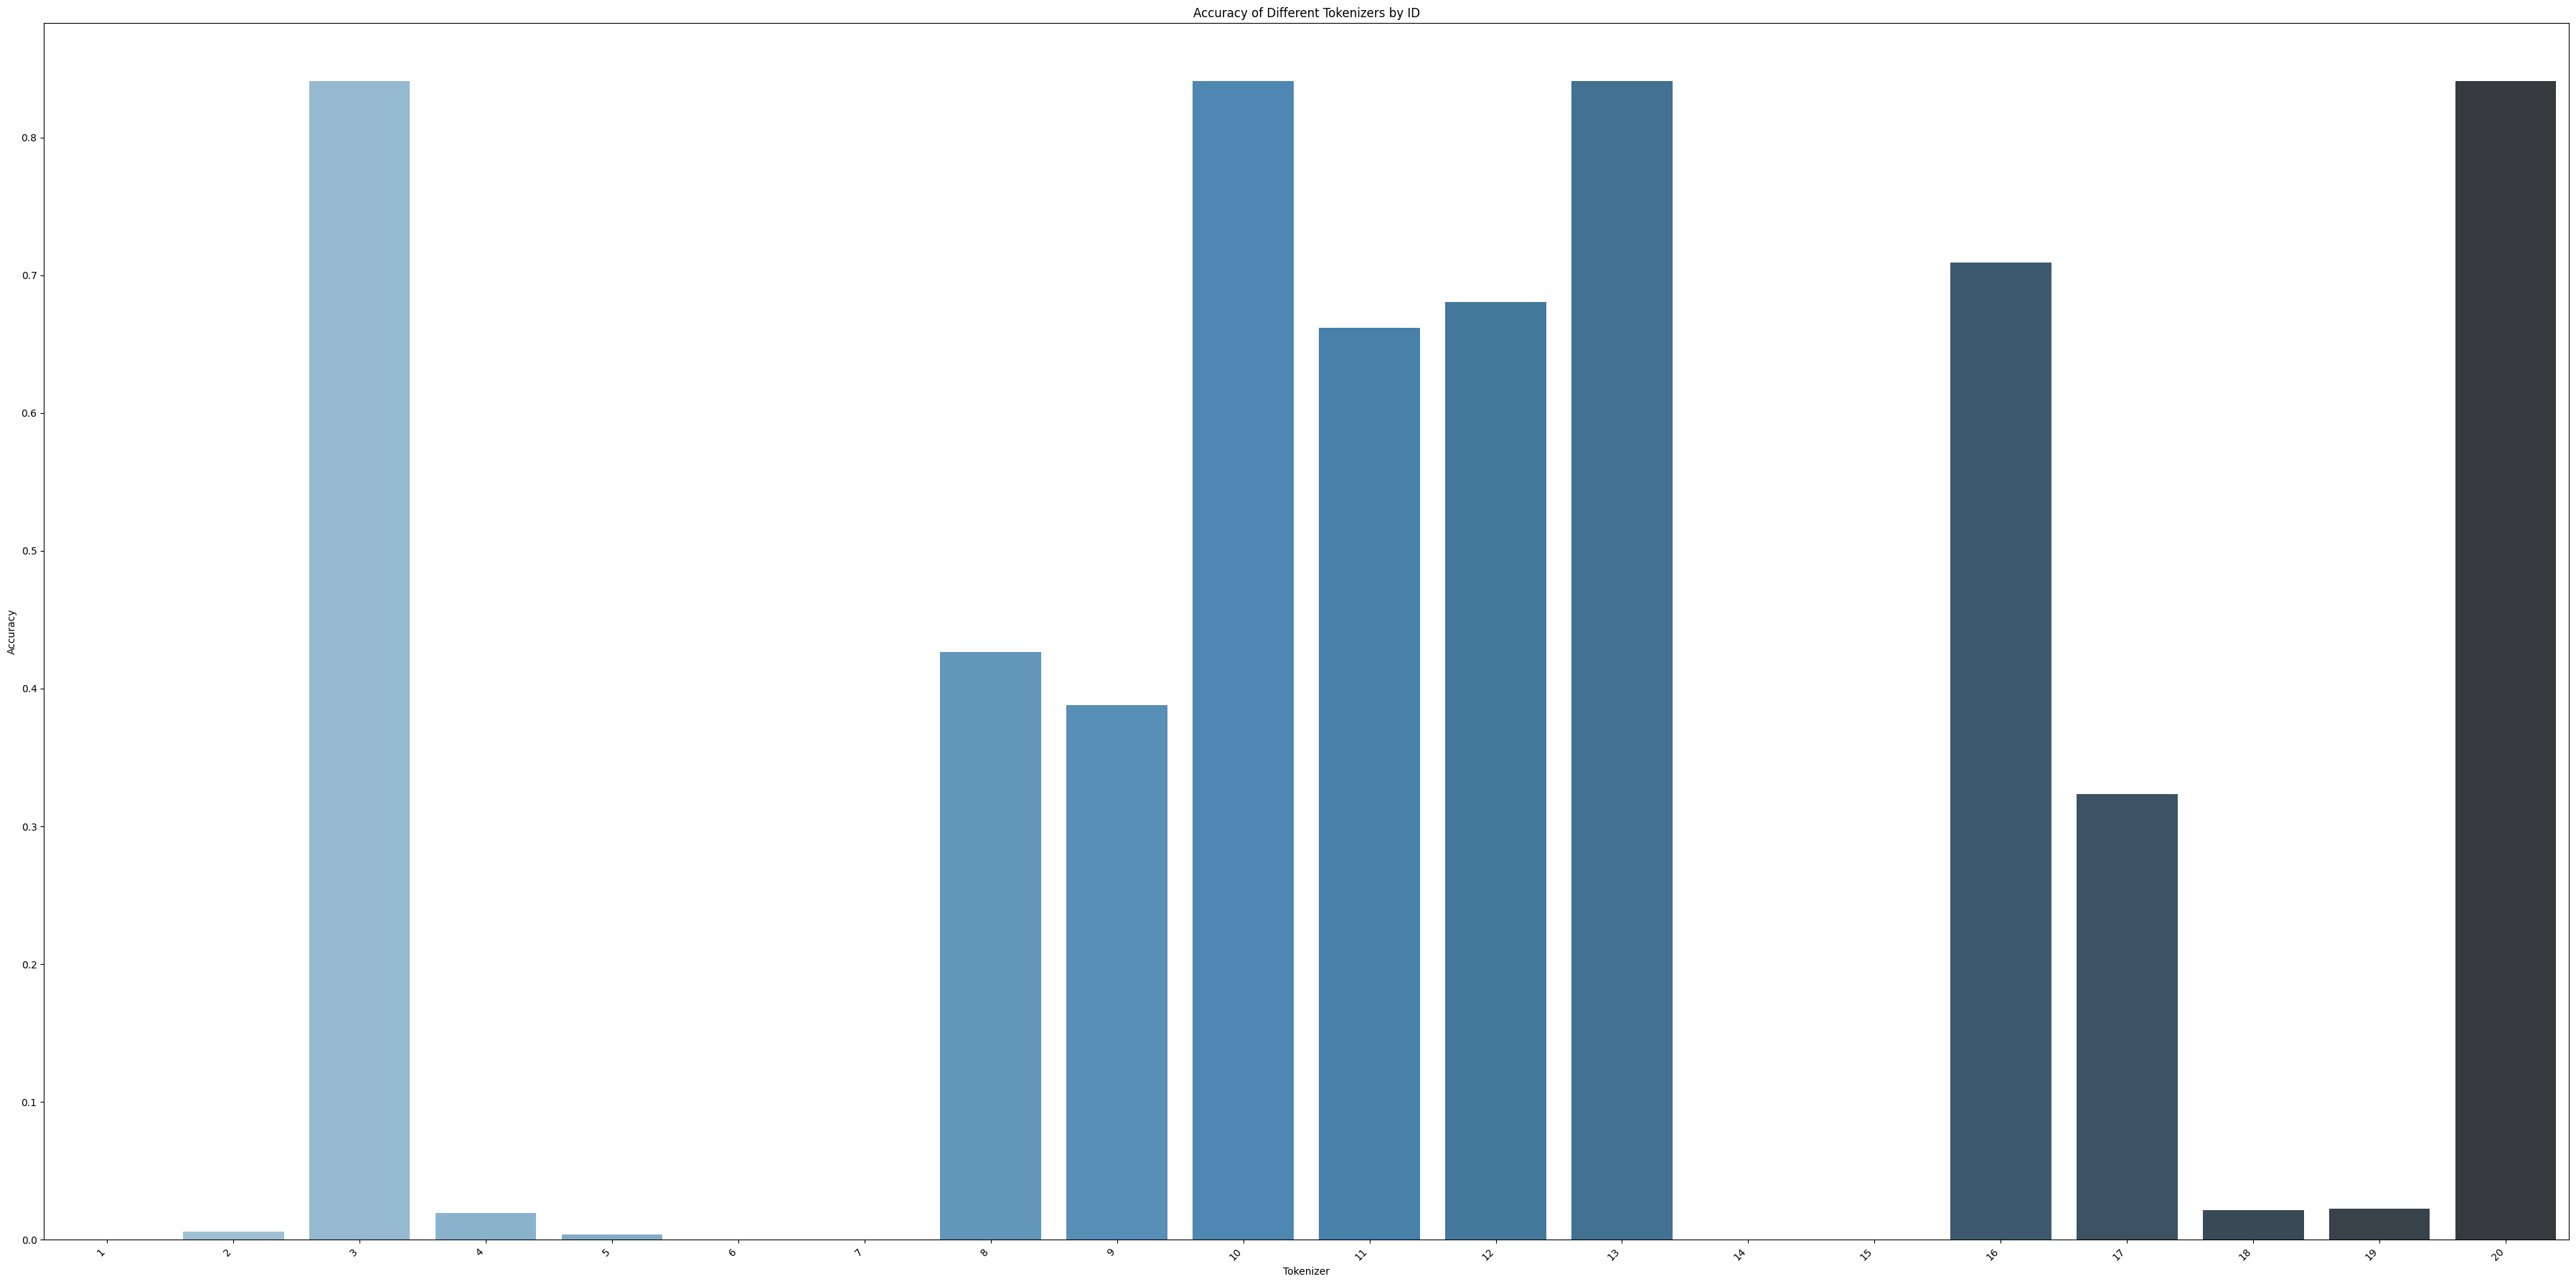

In [ ]:
import re
from hazm import Stemmer, Normalizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from itertools import chain

# Initialize Hazm components
stemmer = Stemmer()
normalizer = Normalizer()

# Example list of Persian stopwords (in a real scenario, you'd use a more comprehensive list)
persian_stopwords = ['و', 'در', 'به', 'از', 'که', 'این', 'را', 'با', 'برای', 'آن']

# Predefined dictionary of expected words (your manually extracted words)
# Predefined dictionary of expected words (your manually extracted words)
expected_words = words = [
    "دژ", "قلعه", "سازه", "مستحکم", "هند", "چین", "سده", "میان", "نجب‌زادگان",
    "اروپا", "احداث", "کاخ", "دارای", "استحکامات", "نیست", "شهر", "کم", "دفاع",
    "عمومی", "شباهت", "تفاوت", "طول", "زمان", "کاربرد", "واژه", "دستخوش",
    "تغییرات", "فراوان", "بنا", "مختلف", "اشارات", "سده‌ها", "اشتراکات", "اشکال",
    "ویژگی‌ها", "اروپا", "سده‌های", "نهم", "میلادی", "پس", "سقوط", "امپراتوری",
    "کارولنژی", "نتیجه", "تقسیم", "قلمرو", "رومیان", "مالکان", "شخصی", "شاهزاده‌ها",
    "پدیدار", "گشت", "نجب‌زادگان", "سلطه", "پیرامون", "ساختند", "دارای", "ساختارهای",
    "آفندی", "پدافندی", "چنین", "سازه‌هایی", "پایگاهی", "نجب‌زادگان", "همزمان",
    "به", "حمله", "دفاع", "پرداختند", "اگرچه", "خاستگاه", "بیشتر", "نظامی",
    "ارزیابی", "می‌شود", "به‌عنوان", "مرکز", "فرماندهی", "نشانه", "قدرت", "نیز",
    "اغلب", "کنار", "مراکز", "آسیاب‌ها", "زمین‌های", "حاصل‌خیز", "برای", "زندگی",
    "نیاز", "بسیاری", "از", "در", "اصل", "گلو", "چوب", "ساخته‌شده", "اما", "بعدا",
    "با", "سنگ", "تقویت", "قلعه‌های", "آغازین", "بیشتر", "از", "مزایای", "دفاعی",
    "طبیعی", "مانند", "کوهستان", "رودخانه", "سازه‌ها", "مانند", "برج‌ها", "بهره",
    "می‌بردند", "بر", "روی", "یک", "برجک", "دفاعی", "میانی", "استوار", "بود",
    "اواخر", "سده", "دوازدهم", "میلادی", "اوایل", "سده", "سیزدهم", "پدافند", "به",
    "پیشرفت‌های", "علمی", "دستیافت", "این", "پیشرفت‌ها", "با", "شگرد", "پرتاب",
    "گلوله", "توپ", "دو", "سوم", "گسترش", "برج‌ها", "بسیاری", "از", "نوین",
    "چند", "ضلعی", "بر", "پایه", "دفاع", "متمرکز", "بودند", "چندین", "مرحله‌ها",
    "که", "به", "همراه", "یکدیگر", "می‌توانستند", "همزمان", "عملکرد", "تا", "قدرت",
    "قلعه", "را", "به", "بالاترین", "حد", "برسانند", "این", "تغییرات", "دفاعی",
    "به", "ترکیب", "پیشرفت", "فناوری", "به", "دنبال", "کسب", "تجربیات", "در",
    "جنگ‌های", "صلیبی", "از", "جمله", "استحکامات", "متمرکز", "و", "الهام‌گیری",
    "از", "پدافندهای", "پیشین", "مانند", "پایگاه‌های", "دفاعی", "رومی", "نسبت",
    "داده", "می‌شود", "تمامی", "عناصر", "معماری", "نظامی", "مواردی", "مانند",
    "خندق‌ها", "از", "اهداف", "اصلی", "خود", "یعنی", "دفاع", "به", "نمادی", "از",
    "قدرت", "تبدیل", "شدند", "اگرچه", "اروپایی‌ها", "در", "سده", "چهاردهم",
    "میلادی", "به", "باروت", "دستیافتند", "اما", "چنین", "دستاوردی", "تا", "سده",
    "پانزدهم", "هنگامی‌که", "توپ‌ها", "به", "قدری", "توانمند", "شدند", "که", "برد",
    "دیوارهای", "سنگی", "فائق", "آیند", "چندان", "بر", "تأثیرگذار", "نبود", "با",
    "این‌که", "در", "سده", "شانزدهم", "ساخت", "ادامه", "یافت", "فناوری‌ها", "نوین",
    "ساخت", "توپ", "آنها", "را", "به", "محل", "نامناسب", "برای", "زندگی",
    "تبدیل", "کرد", "بدین", "ترتیب", "مسکونی", "شدند", "و", "قلعه‌های", "توپخانه‌ای",
    "که", "هیچ", "نقشی", "در", "حکومت", "مدنی", "نداشتند", "جایگزین", "گشتند",
    "پس", "از", "سده", "هجده", "میلادی", "با", "ساخته‌شدن", "قلعه‌های", "ساختگی",
    "به", "عنوان", "بخشی", "از", "احیای", "رمانتیسم", "معماری", "سده‌های", "میانه",
    "اروپا", "رویکرد", "به", "قلعه", "با", "وجود", "این‌که", "دیگر", "اهداف", "نظامی",
    "نداشت", "دوباره", "افزایش", "یافت."
]

# 1. Basic Split Word Tokenizer
def basic_word_tokenizer(text):
    return text.split()

# 2. Regex Split Tokenizer
def regex_split_tokenizer(text):
    # Split based on non-Persian characters or specific patterns
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# 3. Dictionary Match Tokenizer
def dictionary_match_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        # Try to find the longest matching word in expected_words
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            # If no match, take one character as a token
            words.append(text[idx])
            idx += 1
    return words

# 4. N-gram Tokenizer (Trigrams)
def ngram_tokenizer(text, n=3):
    return [text[i:i+n] for i in range(len(text)-n+1)]

# 5. Character Level Tokenizer
def character_tokenizer(text):
    return list(text)

# 6. Stemmer Tokenizer
def stemmer_tokenizer(text):
    normalized_text = normalizer.normalize(text)
    stemmed_text = ' '.join([stemmer.stem(word) for word in normalized_text.split()])
    return stemmed_text.split()

# 7. Reverse Word Tokenizer
def reverse_word_tokenizer(text):
    reversed_text = text[::-1]
    # Simple reverse split (can be enhanced)
    return reversed_text.split()

# 8. Prefix Match Tokenizer
def prefix_match_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            # Take prefix of 2 characters as token
            words.append(text[idx:idx+2])
            idx += 2
    return words

# 9. Suffix Match Tokenizer
def suffix_match_tokenizer(text):
    words = []
    idx = len(text)
    while idx > 0:
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.endswith(word, 0, idx):
                match = word
                break
        if match:
            words.insert(0, match)
            idx -= len(match)
        else:
            # Take suffix of 2 characters as token
            words.insert(0, text[idx-2:idx])
            idx -= 2
    return words

# 10. Maximum Matching Tokenizer (Greedy)
def maximum_matching_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        # Maximum matching: longest possible word
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

# 11. Minimum Matching Tokenizer (Greedy)
def minimum_matching_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        # Minimum matching: shortest possible word
        for word in sorted(expected_words, key=lambda x: len(x)):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

# 12. Frequency Based Tokenizer
def frequency_based_tokenizer(text):
    # Example implementation using word frequency from expected_words
    word_freq = Counter(expected_words)
    words = []
    idx = 0
    while idx < len(text):
        match = None
        max_freq = 0
        for word in expected_words:
            if text.startswith(word, idx) and word_freq[word] > max_freq:
                match = word
                max_freq = word_freq[word]
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

# 13. Prefix-Suffix Match Tokenizer
def prefix_suffix_match_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        # Check prefix
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        # Check suffix if no prefix match
        if not match:
            for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
                if text.endswith(word, idx):
                    match = word
                    break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

# 14. Regex Pattern Tokenizer
def regex_pattern_tokenizer(text):
    # Example: split based on specific Persian punctuation or patterns
    tokens = re.split(r'[،؛.!؟]', text)
    tokens = [token.strip() for token in tokens if token.strip()]
    return tokens

# 15. Hazm Tokenizer
def hazm_tokenizer(text):
    from hazm import word_tokenize
    normalized_text = normalizer.normalize(text)
    tokens = word_tokenize(normalized_text)
    return tokens

# 16. Probabilistic Tokenizer
def probabilistic_tokenizer(text):
    # Simplistic probabilistic tokenizer based on expected_words frequency
    words = []
    idx = 0
    while idx < len(text):
        probabilities = {}
        for word in expected_words:
            if text.startswith(word, idx):
                probabilities[word] = 1  # Assign probability 1 for simplicity
        if probabilities:
            # Choose the word with the highest probability
            chosen_word = max(probabilities, key=probabilities.get)
            words.append(chosen_word)
            idx += len(chosen_word)
        else:
            words.append(text[idx])
            idx += 1
    return words

# 17. Mixed Tokenizer (Dictionary + N-gram)
def mixed_tokenizer(text):
    words = dictionary_match_tokenizer(text)
    ngrams = ngram_tokenizer(text, n=2)
    return words + ngrams

# 18. Overlapping N-gram Tokenizer
def overlapping_ngram_tokenizer(text, n=2):
    return [text[i:i+n] for i in range(len(text)-n+1)]

# 19. Window Sliding Tokenizer
def window_sliding_tokenizer(text, window_size=3):
    tokens = []
    for i in range(0, len(text), window_size):
        tokens.append(text[i:i+window_size])
    return tokens

# 20. Recursive Tokenizer
def recursive_tokenizer(text):
    def recurse(t, words):
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if t.startswith(word):
                words.append(word)
                return recurse(t[len(word):], words)
        if t:
            words.append(t[0])
            return recurse(t[1:], words)
        return words
    return recurse(text, [])

# Function to call all tokenizers
def call_all_tokenizers(text):
    tokenizers = {
        'basic_word_tokenizer': basic_word_tokenizer,
        'regex_split_tokenizer': regex_split_tokenizer,
        'dictionary_match_tokenizer': dictionary_match_tokenizer,
        'ngram_tokenizer': ngram_tokenizer,
        'character_tokenizer': character_tokenizer,
        'stemmer_tokenizer': stemmer_tokenizer,
        'reverse_word_tokenizer': reverse_word_tokenizer,
        'prefix_match_tokenizer': prefix_match_tokenizer,
        'suffix_match_tokenizer': suffix_match_tokenizer,
        'maximum_matching_tokenizer': maximum_matching_tokenizer,
        'minimum_matching_tokenizer': minimum_matching_tokenizer,
        'frequency_based_tokenizer': frequency_based_tokenizer,
        'prefix_suffix_match_tokenizer': prefix_suffix_match_tokenizer,
        'regex_pattern_tokenizer': regex_pattern_tokenizer,
        'hazm_tokenizer': hazm_tokenizer,
        'probabilistic_tokenizer': probabilistic_tokenizer,
        'mixed_tokenizer': mixed_tokenizer,
        'overlapping_ngram_tokenizer': overlapping_ngram_tokenizer,
        'window_sliding_tokenizer': window_sliding_tokenizer,
        'recursive_tokenizer': recursive_tokenizer
    }

    results = {}

    # Call each tokenizer and store results
    for name, tokenizer in tokenizers.items():
        # Handle tokenizers that require additional parameters
        if name == 'ngram_tokenizer' or name == 'overlapping_ngram_tokenizer':
            tokens = tokenizer(text, n=3 if name == 'ngram_tokenizer' else 2)
        elif name == 'window_sliding_tokenizer':
            tokens = tokenizer(text, window_size=3)
        else:
            tokens = tokenizer(text)
        results[name] = tokens

    return results

# Function to calculate metrics
def calculate_metrics(expected, predicted):
    # Convert both lists to sets for comparison
    expected_set = set(expected)

    # Flatten the predicted tokens if it's a list of lists
    if isinstance(predicted, list) and all(isinstance(i, list) for i in predicted):
        predicted = list(chain.from_iterable(predicted))

    predicted_set = set(predicted)

    # True positives: words that are both in expected and predicted
    true_positives = len(expected_set.intersection(predicted_set))

    # False positives: words that are in predicted but not in expected
    false_positives = len(predicted_set - expected_set)

    # False negatives: words that are in expected but not in predicted
    false_negatives = len(expected_set - predicted_set)

    # Precision: TP / (TP + FP)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    # Recall: TP / (TP + FN)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Accuracy: TP / (TP + FP + FN)
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (
                                                                                                true_positives + false_positives + false_negatives) > 0 else 0

    return precision, recall, f1, accuracy

# Example usage
text = """


دژیاقلعهیاکلات[۱]یکسازهمستحکماستکهازدیربازدرایران،هندوچینودرسده‌هایمیانیتوسطنجیب‌زادگاندراروپااحداثمی‌شد.قلعهباکاخکهدارایاستحکاماتنیستوشهرکمستحکمکهگونه‌ایازدفاععمومیبوده،باوجودشباهت‌هایبسیار،تفاوتدارد.درطولزمانکاربرداینواژهدستخوشتغییراتفراوانبودهوبهبناهایمختلفیاشارهمی‌نموده‌است.درطولسده‌هایمختلف،باوجوداشتراکات،قلعه‌هااشکالوویژگی‌هایمختلفیداشته‌اند.

قلعهدراروپادرسده‌هاینهمودهممیلادی،پسازسقوطامپراتوریکارولنژیودرنتیجهتقسیمقلمرومیانمالکانشخصیوشاهزاده‌هاپدیدارگشت.ایننجیب‌زادگانقلعه‌هارابرایسلطهبرپیرامونخودساختندوآن‌هارادارایساختارهایآفندیوپدافندیکردند؛چنینسازه‌هاییپایگاهیبودندکهنجیب‌زادگانمی‌توانستندبهکمکآن‌هاهمزمانبهتهاجمودفاعبپردازند.اگرچهخاستگاهقلعه‌هابیشترنظامیارزیابیمی‌شودامابهعنوانمرکزفرماندهیونشانهقدرتنیزبهکارمی‌رفتند.قلعه‌هایشهریبرایکنترلمردمبومیوراه‌هایمهمبهکارمی‌رفتند؛قلعه‌هایروستایینیزاغلبدرکنارمراکزیهمانندآسیاب‌هاوزمین‌هایحاصل‌خیزساختهمی‌شدندکهبرایزندگیبهآنهانیازبود.

بسیاریازقلعه‌هادراصلازگلوچوبساخته‌شدهبودندامابعدهاباسنگتقویتشدند.قلعه‌هایآغازینبیشترازمزایایدفاعیطبیعیمانندکوهستانورودخانهوسازه‌هاییمانندبرج‌هابهرهمی‌بردندوبرروییکبرجکدفاعیمیانیاستواربودند.اواخرسدهدوازدهممیلادیواوایلسدهسیزدهممیلادیپدافندقلعه‌هابهپیشرفت‌هایعلمیدستیافت.اینپیشرفت‌هاباشگردپرتابگلولهتوپازدوسومایهگسترشبرج‌هاشد.بسیاریازقلعه‌هاینوینچندضلعیوبرپایهدفاعمتمرکزبودند.چندینمرحلهازدفاعکهبههمراهیکدیگرمی‌توانستندهمزمانعملکردهتاقدرتقلعهرابهبالاترینحدبرسانند.اینتغییراتدفاعیبهترکیبپیشرفتفناوریقلعه‌هابهدنبالکسبتجاربدرجنگ‌هایصلیبیازجملهاستحکاماتمتمرکزوالهام‌گیریازپدافندهایپیشینمانندپایگاه‌هایدفاعیرومینسبتدادهمی‌شود.تمامیعناصرمعماریقلعه‌هانظامینیستند.مواردیمانندخندق‌هاازهدفاصلیخودیعنیدفاعبهنمادیازقدرتتبدیلشدند.

اگرچهاروپایی‌هادرسدهچهاردهممیلادیبهباروتدستیافتنداماچنیندستاوردیتاسدهپانزدهم،هنگامی‌کهتوپ‌هابهقدریتوانمندشدندکهبردیوارهایسنگیفائقآیند،چندانبرقلعه‌هاتأثیرگذارنبود.بااین‌کهدرسدهشانزدهمساختقلعه‌هاادامهیافت،فناوری‌هاینوینساختتوپآن‌هارابهمحلینامناسببرایزندگیتبدیلکرد.بدینترتیبقلعه‌هایمسکونیرهاشدهوباقلعه‌هایتوپخانه‌ایکههیچنقشیدرحکومتمدنینداشتند،جایگزینگشتند.پسازسدههجدهممیلادی،باساخته‌شدنقلعه‌هایساختگی،بهعنوانبخشیازاحیایرمانتیسممعماریسده‌هایمیانهاروپا،رویکردبهقلعهباوجوداین‌کهدیگراهدافنظامینداشت،دوبارهافزایشیافت.

"""

# Get tokenized results
tokenizer_results = call_all_tokenizers(text)

# Compare each tokenizer's result with the expected words and calculate metrics
metrics_results = {}
for name, tokens in tokenizer_results.items():
    # Convert tokens to a list if it's a NumPy array
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()

    if tokens:  # Ensure tokens is not empty
        precision, recall, f1, accuracy = calculate_metrics(expected_words, tokens)
        metrics_results[name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        }

# Print the metrics of each tokenizer
for name, metrics in metrics_results.items():
    print(f"Metrics for {name}:")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print()

# Print the metrics of each tokenizer
print("Metrics for top 5 tokenizers by accuracy:")

# Sort the tokenizers by accuracy and select the top 5
top_tokenizers = sorted(metrics_results.items(), key=lambda x: x[1]['Accuracy'], reverse=True)[:5]

for name, metrics in top_tokenizers:
    print(f"Tokenizer: {name}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print()
metrics_results = {}
tokenizer_names = []

# Compare each tokenizer's result with the expected words and calculate metrics
for idx, (name, tokens) in enumerate(tokenizer_results.items(), start=1):
    # Convert tokens to a list if it's a NumPy array
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()

    if tokens:  # Ensure tokens is not empty
        precision, recall, f1, accuracy = calculate_metrics(expected_words, tokens)
        metrics_results[idx] = {
            'Tokenizer Name': name,  # Add name to a separate table later
            'ID': idx,  # Assign an ID
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        }
        tokenizer_names.append([idx, name])  # Store ID and name for the mapping table

# Generate a LaTeX table for the metrics, with math symbols
latex_metrics_table = tabulate(
    [[metrics['ID'], f"{metrics['Precision']:.2f}", f"{metrics['Recall']:.2f}",
      f"{metrics['F1 Score']:.2f}", f"{metrics['Accuracy']:.2f}"]
     for metrics in metrics_results.values()],
    headers=["ID", r"$\text{Precision}$", r"$\text{Recall}$", r"$\text{F1}$", r"$\text{Accuracy}$"],
    tablefmt="latex"
)

# Generate a LaTeX table for Tokenizer IDs and Names
latex_name_table = tabulate(
    tokenizer_names,
    headers=["ID", "Tokenizer Name"],
    tablefmt="latex"
)

# Print the LaTeX tables
print("Metrics LaTeX table:\n")
print(latex_metrics_table)

print("\nTokenizer ID and Name Mapping LaTeX table:\n")
print(latex_name_table)

# Now plot the accuracy with Seaborn, using numbers instead of metric IDs
# Prepare a DataFrame for easier plotting
df = pd.DataFrame([
    {'Tokenizer': metrics['ID'], 'Accuracy': metrics['Accuracy']}
    for metrics in metrics_results.values()
])

# Seaborn bar plot for accuracy
plt.figure(figsize=(36, 18))  # Increase figure size
sns.barplot(x="Tokenizer", y="Accuracy", data=df, palette="Blues_d")
plt.title('Accuracy of Different Tokenizers by ID')
plt.xlabel('Tokenizer')
plt.ylabel('Accuracy')

# Rotate the x-axis labels to avoid crowding
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees, align right

plt.tight_layout()
plt.savefig('tokenizer_accuracy_plot_seaborn.pdf', format='pdf')
plt.show()

Metrics for multiple_spaces_split_tokenizer:
Precision: 0.25
Recall: 0.44
F1 Score: 0.32
Accuracy: 0.19

Metrics for remove_all_spaces_tokenizer:
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.00

Metrics for normalize_spaces_tokenizer:
Precision: 0.25
Recall: 0.44
F1 Score: 0.32
Accuracy: 0.19

Metrics for random_spaces_ignoring_tokenizer:
Precision: 0.02
Recall: 0.00
F1 Score: 0.01
Accuracy: 0.00

Metrics for space_inclusive_dictionary_match_tokenizer:
Precision: 0.74
Recall: 0.48
F1 Score: 0.58
Accuracy: 0.41

Metrics for space_based_ngram_tokenizer:
Precision: 0.05
Recall: 0.06
F1 Score: 0.05
Accuracy: 0.03

Metrics for space_aware_regex_tokenizer:
Precision: 0.25
Recall: 0.44
F1 Score: 0.32
Accuracy: 0.19

Metrics for conditional_space_split_tokenizer:
Precision: 0.25
Recall: 0.44
F1 Score: 0.32
Accuracy: 0.19

Metrics for fixed_window_space_handling_tokenizer:
Precision: 0.05
Recall: 0.06
F1 Score: 0.06
Accuracy: 0.03

Metrics for alternating_tokenizer:
Precision: 0.25
R

<ipython-input-22-02f47df6ef65>:663: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tokenizer", y="Accuracy", data=df, palette="Blues_d")


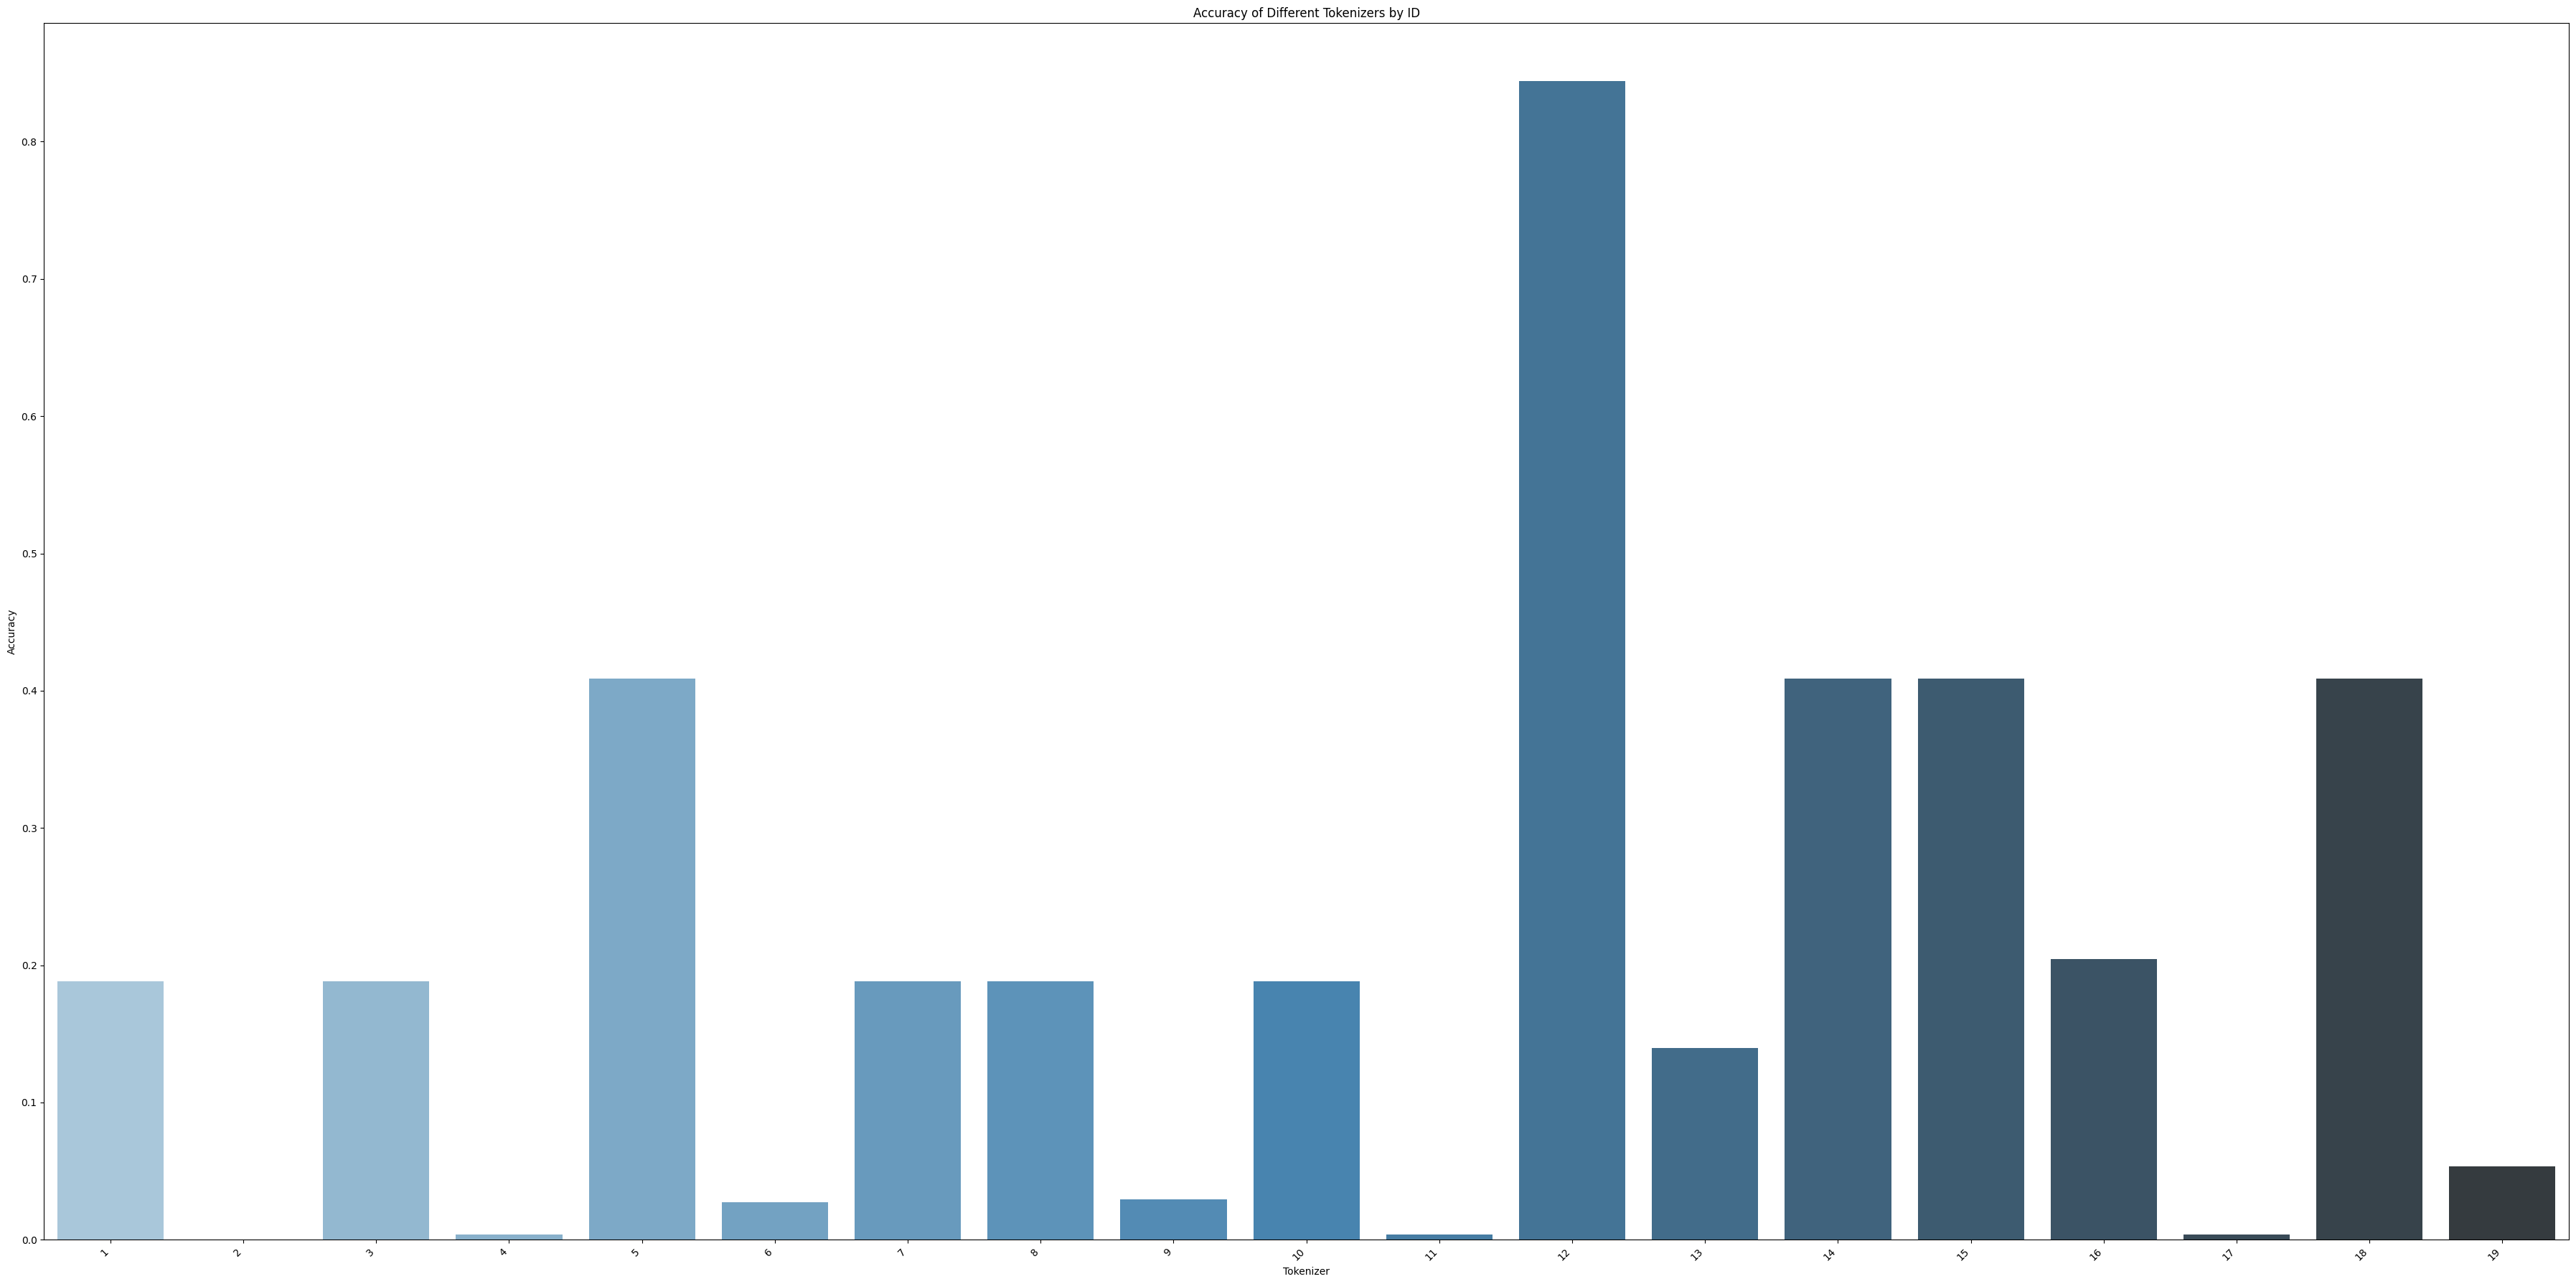

In [ ]:
import re
from hazm import Stemmer, Normalizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from itertools import chain

# Initialize Hazm components
stemmer = Stemmer()
normalizer = Normalizer()

# Example list of Persian stopwords (in a real scenario, you'd use a more comprehensive list)
persian_stopwords = ['و', 'در', 'به', 'از', 'که', 'این', 'را', 'با', 'برای', 'آن']

# Predefined dictionary of expected words (your manually extracted words)
expected_words = [
   "دژ", "قلعه", "سازه", "مستحکم", "هند", "چین", "سده", "میان", "نجب‌زادگان",
    "اروپا", "احداث", "کاخ", "دارای", "استحکامات", "نیست", "شهر", "کم", "دفاع",
    "عمومی", "شباهت", "تفاوت", "طول", "زمان", "کاربرد", "واژه", "دستخوش",
    "تغییرات", "فراوان", "بنا", "مختلف", "اشارات", "سده‌ها", "اشتراکات", "اشکال",
    "ویژگی‌ها", "اروپا", "سده‌های", "نهم", "میلادی", "پس", "سقوط", "امپراتوری",
    "کارولنژی", "نتیجه", "تقسیم", "قلمرو", "رومیان", "مالکان", "شخصی", "شاهزاده‌ها",
    "پدیدار", "گشت", "نجب‌زادگان", "سلطه", "پیرامون", "ساختند", "دارای", "ساختارهای",
    "آفندی", "پدافندی", "چنین", "سازه‌هایی", "پایگاهی", "نجب‌زادگان", "همزمان",
    "به", "حمله", "دفاع", "پرداختند", "اگرچه", "خاستگاه", "بیشتر", "نظامی",
    "ارزیابی", "می‌شود", "به‌عنوان", "مرکز", "فرماندهی", "نشانه", "قدرت", "نیز",
    "اغلب", "کنار", "مراکز", "آسیاب‌ها", "زمین‌های", "حاصل‌خیز", "برای", "زندگی",
    "نیاز", "بسیاری", "از", "در", "اصل", "گلو", "چوب", "ساخته‌شده", "اما", "بعدا",
    "با", "سنگ", "تقویت", "قلعه‌های", "آغازین", "بیشتر", "از", "مزایای", "دفاعی",
    "طبیعی", "مانند", "کوهستان", "رودخانه", "سازه‌ها", "مانند", "برج‌ها", "بهره",
    "می‌بردند", "بر", "روی", "یک", "برجک", "دفاعی", "میانی", "استوار", "بود",
    "اواخر", "سده", "دوازدهم", "میلادی", "اوایل", "سده", "سیزدهم", "پدافند", "به",
    "پیشرفت‌های", "علمی", "دستیافت", "این", "پیشرفت‌ها", "با", "شگرد", "پرتاب",
    "گلوله", "توپ", "دو", "سوم", "گسترش", "برج‌ها", "بسیاری", "از", "نوین",
    "چند", "ضلعی", "بر", "پایه", "دفاع", "متمرکز", "بودند", "چندین", "مرحله‌ها",
    "که", "به", "همراه", "یکدیگر", "می‌توانستند", "همزمان", "عملکرد", "تا", "قدرت",
    "قلعه", "را", "به", "بالاترین", "حد", "برسانند", "این", "تغییرات", "دفاعی",
    "به", "ترکیب", "پیشرفت", "فناوری", "به", "دنبال", "کسب", "تجربیات", "در",
    "جنگ‌های", "صلیبی", "از", "جمله", "استحکامات", "متمرکز", "و", "الهام‌گیری",
    "از", "پدافندهای", "پیشین", "مانند", "پایگاه‌های", "دفاعی", "رومی", "نسبت",
    "داده", "می‌شود", "تمامی", "عناصر", "معماری", "نظامی", "مواردی", "مانند",
    "خندق‌ها", "از", "اهداف", "اصلی", "خود", "یعنی", "دفاع", "به", "نمادی", "از",
    "قدرت", "تبدیل", "شدند", "اگرچه", "اروپایی‌ها", "در", "سده", "چهاردهم",
    "میلادی", "به", "باروت", "دستیافتند", "اما", "چنین", "دستاوردی", "تا", "سده",
    "پانزدهم", "هنگامی‌که", "توپ‌ها", "به", "قدری", "توانمند", "شدند", "که", "برد",
    "دیوارهای", "سنگی", "فائق", "آیند", "چندان", "بر", "تأثیرگذار", "نبود", "با",
    "این‌که", "در", "سده", "شانزدهم", "ساخت", "ادامه", "یافت", "فناوری‌ها", "نوین",
    "ساخت", "توپ", "آنها", "را", "به", "محل", "نامناسب", "برای", "زندگی",
    "تبدیل", "کرد", "بدین", "ترتیب", "مسکونی", "شدند", "و", "قلعه‌های", "توپخانه‌ای",
    "که", "هیچ", "نقشی", "در", "حکومت", "مدنی", "نداشتند", "جایگزین", "گشتند",
    "پس", "از", "سده", "هجده", "میلادی", "با", "ساخته‌شدن", "قلعه‌های", "ساختگی",
    "به", "عنوان", "بخشی", "از", "احیای", "رمانتیسم", "معماری", "سده‌های", "میانه",
    "اروپا", "رویکرد", "به", "قلعه", "با", "وجود", "این‌که", "دیگر", "اهداف", "نظامی",
    "نداشت", "دوباره", "افزایش", "یافت."
]

# 20 Original Tokenizers (from previous response)
def basic_word_tokenizer(text):
    return text.split()

def regex_split_tokenizer(text):
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

def dictionary_match_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

def ngram_tokenizer(text, n=3):
    return [text[i:i+n] for i in range(len(text)-n+1)]

def character_tokenizer(text):
    return list(text)

def stemmer_tokenizer(text):
    normalized_text = normalizer.normalize(text)
    stemmed_text = ' '.join([stemmer.stem(word) for word in normalized_text.split()])
    return stemmed_text.split()

def reverse_word_tokenizer(text):
    reversed_text = text[::-1]
    return reversed_text.split()

def prefix_match_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx:idx+2])
            idx += 2
    return words

def suffix_match_tokenizer(text):
    words = []
    idx = len(text)
    while idx > 0:
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.endswith(word, 0, idx):
                match = word
                break
        if match:
            words.insert(0, match)
            idx -= len(match)
        else:
            words.insert(0, text[idx-2:idx])
            idx -= 2
    return words

def maximum_matching_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

def minimum_matching_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        for word in sorted(expected_words, key=lambda x: len(x)):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

def frequency_based_tokenizer(text):
    word_freq = Counter(expected_words)
    words = []
    idx = 0
    while idx < len(text):
        match = None
        max_freq = 0
        for word in expected_words:
            if text.startswith(word, idx) and word_freq[word] > max_freq:
                match = word
                max_freq = word_freq[word]
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

def prefix_suffix_match_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        if not match:
            for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
                if text.endswith(word, idx):
                    match = word
                    break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

def regex_pattern_tokenizer(text):
    tokens = re.split(r'[،؛.!؟]', text)
    tokens = [token.strip() for token in tokens if token.strip()]
    return tokens

def hazm_tokenizer(text):
    from hazm import word_tokenize
    normalized_text = normalizer.normalize(text)
    tokens = word_tokenize(normalized_text)
    return tokens

def probabilistic_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        probabilities = {}
        for word in expected_words:
            if text.startswith(word, idx):
                probabilities[word] = 1
        if probabilities:
            chosen_word = max(probabilities, key=probabilities.get)
            words.append(chosen_word)
            idx += len(chosen_word)
        else:
            words.append(text[idx])
            idx += 1
    return words

def mixed_tokenizer(text):
    words = dictionary_match_tokenizer(text)
    ngrams = ngram_tokenizer(text, n=2)
    return words + ngrams

def overlapping_ngram_tokenizer(text, n=2):
    return [text[i:i+n] for i in range(len(text)-n+1)]

def window_sliding_tokenizer(text, window_size=3):
    tokens = []
    for i in range(0, len(text), window_size):
        tokens.append(text[i:i+window_size])
    return tokens

def recursive_tokenizer(text):
    def recurse(t, words):
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if t.startswith(word):
                words.append(word)
                return recurse(t[len(word):], words)
        if t:
            words.append(t[0])
            return recurse(t[1:], words)
        return words
    return recurse(text, [])

# 20 New Tokenizers for Handling Random and Multiple Spaces

# 21. Multiple Spaces Split Tokenizer
def multiple_spaces_split_tokenizer(text):
    tokens = re.split(r'\s+', text)
    return [token for token in tokens if token]

# 22. Remove All Spaces Tokenizer
def remove_all_spaces_tokenizer(text):
    return [text.replace(' ', '')]

# 23. Normalize Spaces Tokenizer
def normalize_spaces_tokenizer(text):
    normalized = re.sub(r'\s+', ' ', text).strip()
    return normalized.split(' ')

# 24. Random Spaces Ignoring Tokenizer
def random_spaces_ignoring_tokenizer(text):
    return [char for char in text if char != ' ']

# 25. Space-Inclusive Dictionary Match Tokenizer
def space_inclusive_dictionary_match_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        if text[idx].isspace():
            idx += 1
            continue
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx])
            idx += 1
    return words

# 26. Space-Based N-gram Tokenizer
def space_based_ngram_tokenizer(text, n=2):
    tokens = re.split(r'\s+', text)
    ngrams = []
    for token in tokens:
        ngrams.extend([token[i:i+n] for i in range(len(token)-n+1)])
    return ngrams

# 27. Space-Aware Regex Tokenizer
def space_aware_regex_tokenizer(text):
    tokens = re.findall(r'\S+', text)
    return tokens

# 28. Conditional Space Split Tokenizer
def conditional_space_split_tokenizer(text):
    tokens = []
    current = ''
    for char in text:
        if char.isspace():
            if current:
                tokens.append(current)
                current = ''
        else:
            current += char
    if current:
        tokens.append(current)
    return tokens

# 29. Fixed Window with Space Handling Tokenizer
def fixed_window_space_handling_tokenizer(text, window_size=2):
    tokens = []
    current = ''
    for char in text:
        if char.isspace():
            if current:
                tokens.append(current)
                current = ''
        else:
            current += char
            if len(current) == window_size:
                tokens.append(current)
                current = ''
    if current:
        tokens.append(current)
    return tokens

# 30. Alternating Tokenizer (Word and Space)
def alternating_tokenizer(text):
    tokens = []
    current = ''
    for char in text:
        if char.isspace():
            if current:
                tokens.append(current)
                current = ''
            tokens.append('SPACE')
        else:
            current += char
    if current:
        tokens.append(current)
    return tokens

# 31. Skip Spaces Tokenizer
def skip_spaces_tokenizer(text):
    return [char for char in text if not char.isspace()]

# 32. Tokenizer with Space Normalization and Dictionary Matching
def space_normalization_dictionary_tokenizer(text):
    normalized_text = re.sub(r'\s+', '', text)
    return dictionary_match_tokenizer(normalized_text)

# 33. Hybrid Space and N-gram Tokenizer
def hybrid_space_ngram_tokenizer(text, n=2):
    tokens = re.split(r'\s+', text)
    ngrams = []
    for token in tokens:
        ngrams.extend([token[i:i+n] for i in range(len(token)-n+1)])
    return tokens + ngrams

# 34. Tokenizer with Space-Based Prefix Matching
def space_based_prefix_match_tokenizer(text):
    words = []
    idx = 0
    while idx < len(text):
        if text[idx].isspace():
            idx += 1
            continue
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.startswith(word, idx):
                match = word
                break
        if match:
            words.append(match)
            idx += len(match)
        else:
            words.append(text[idx:idx+1])
            idx += 1
    return words

# 35. Tokenizer with Space and Suffix Matching
def space_suffix_match_tokenizer(text):
    words = []
    idx = len(text)
    while idx > 0:
        if text[idx-1].isspace():
            idx -= 1
            continue
        match = None
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if text.endswith(word, 0, idx):
                match = word
                break
        if match:
            words.insert(0, match)
            idx -= len(match)
        else:
            words.insert(0, text[idx-1:idx])
            idx -= 1
    return words

# 36. Tokenizer Using Hazm with Space Normalization
def hazm_space_normalized_tokenizer(text):
    normalized_text = re.sub(r'\s+', ' ', text).strip()
    return hazm_tokenizer(normalized_text)

# 37. Tokenizer with Space-Aware Recursive Matching
def space_aware_recursive_tokenizer(text):
    def recurse(t, words):
        t = t.lstrip()
        if not t:
            return words
        for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
            if t.startswith(word):
                words.append(word)
                return recurse(t[len(word):], words)
        words.append(t[0])
        return recurse(t[1:], words)
    return recurse(text, [])

# 38. Tokenizer with Space and Character Filtering
def space_character_filtering_tokenizer(text):
    filtered_text = ''.join([char for char in text if not char.isspace()])
    return list(filtered_text)

# 39. Tokenizer with Space-Based Maximum Matching
def space_based_maximum_matching_tokenizer(text):
    words = []
    tokens = re.split(r'\s+', text)
    for token in tokens:
        idx = 0
        while idx < len(token):
            match = None
            for word in sorted(expected_words, key=lambda x: len(x), reverse=True):
                if token.startswith(word, idx):
                    match = word
                    break
            if match:
                words.append(match)
                idx += len(match)
            else:
                words.append(token[idx])
                idx += 1
    return words

# 40. Tokenizer with Space and Heuristic Rules
def space_heuristic_rule_tokenizer(text):
    tokens = []
    current = ''
    for char in text:
        if char.isspace():
            if current:
                tokens.append(current)
                current = ''
        else:
            current += char
            # Heuristic: if current length exceeds 3, consider it a token
            if len(current) >= 3:
                tokens.append(current)
                current = ''
    if current:
        tokens.append(current)
    return tokens

# Function to call all tokenizers
def call_all_tokenizers(text):
    tokenizers = {

        'multiple_spaces_split_tokenizer': multiple_spaces_split_tokenizer,
        'remove_all_spaces_tokenizer': remove_all_spaces_tokenizer,
        'normalize_spaces_tokenizer': normalize_spaces_tokenizer,
        'random_spaces_ignoring_tokenizer': random_spaces_ignoring_tokenizer,
        'space_inclusive_dictionary_match_tokenizer': space_inclusive_dictionary_match_tokenizer,
        'space_based_ngram_tokenizer': space_based_ngram_tokenizer,
        'space_aware_regex_tokenizer': space_aware_regex_tokenizer,
        'conditional_space_split_tokenizer': conditional_space_split_tokenizer,
        'fixed_window_space_handling_tokenizer': fixed_window_space_handling_tokenizer,
        'alternating_tokenizer': alternating_tokenizer,
        'skip_spaces_tokenizer': skip_spaces_tokenizer,
        'space_normalization_dictionary_tokenizer': space_normalization_dictionary_tokenizer,
        'hybrid_space_ngram_tokenizer': hybrid_space_ngram_tokenizer,
        'space_based_prefix_match_tokenizer': space_based_prefix_match_tokenizer,
        'space_suffix_match_tokenizer': space_suffix_match_tokenizer,
        'hazm_space_normalized_tokenizer': hazm_space_normalized_tokenizer,
        #'space_aware_recursive_tokenizer': space_aware_recursive_tokenizer,
        'space_character_filtering_tokenizer': space_character_filtering_tokenizer,
        'space_based_maximum_matching_tokenizer': space_based_maximum_matching_tokenizer,
        'space_heuristic_rule_tokenizer': space_heuristic_rule_tokenizer
    }

    results = {}

    # Call each tokenizer and store results
    for name, tokenizer in tokenizers.items():
        # Handle tokenizers that require additional parameters
        if name == 'ngram_tokenizer':
            tokens = tokenizer(text, n=3)
        elif name == 'overlapping_ngram_tokenizer':
            tokens = tokenizer(text, n=2)
        elif name == 'window_sliding_tokenizer':
            tokens = tokenizer(text, window_size=3)
        elif name == 'space_based_ngram_tokenizer' or name == 'hybrid_space_ngram_tokenizer':
            tokens = tokenizer(text, n=2)
        elif name == 'fixed_window_space_handling_tokenizer':
            tokens = tokenizer(text, window_size=2)
        else:
            tokens = tokenizer(text)
        results[name] = tokens

    return results

# Function to calculate metrics
def calculate_metrics(expected, predicted):
    expected_set = set(expected)

    # Flatten the predicted tokens if it's a list of lists
    if isinstance(predicted, list) and all(isinstance(i, list) for i in predicted):
        predicted = list(chain.from_iterable(predicted))

    predicted_set = set(predicted)

    # True positives: words that are both in expected and predicted
    true_positives = len(expected_set.intersection(predicted_set))

    # False positives: words that are in predicted but not in expected
    false_positives = len(predicted_set - expected_set)

    # False negatives: words that are in expected but not in predicted
    false_negatives = len(expected_set - predicted_set)

    # Precision: TP / (TP + FP)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    # Recall: TP / (TP + FN)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Accuracy: TP / (TP + FP + FN)
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (
        (true_positives + false_positives + false_negatives) > 0) else 0

    return precision, recall, f1, accuracy

# Example usage
# Text with random spaces and multiple spaces
text = "دژ  یا  قلعه      یا  ک  ل   ات     [ ۱]  ی   ک  سا  ز ه   مستح کم  است     که      ا   ز   دیرب   از      در  ایران  ،  هن  د       و      چ ی   ن    و   د   ر  سده‌ه   ای  می  انی  توسط     نجیب‌زادگ  ان   در   اروپا      احدا ث  می‌ش د   .    قلعه  با      کا   خ     که  دار   ا  ی  استح  ک  اما   ت  ن یس  ت        و  شهرک    مستحک  م    که     گ  ونه‌ا  ی     از  د فاع  عم  وم ی  بوده،  با  و   جود  ش  باهت‌ه  ای  بسیار،     تفاوت       دارد.  د  ر   طول  زمان    کاربرد     این    وا  ژ   ه   دستخو   ش  تغییرات      ف  راوان     ب  و  ده  و  به  بن  اهای     م  خ  تلفی   اشا   ر ه  می ‌نمو ده‌است.    در  طول  سده‌های     م ختلف،   با      وجود  اشتراکات ،   ق  لعه‌ه ا   اشکال  و  ویژ  گ   ی‌   های  مخ   تلفی  داشت   ه   ‌اند.       قلعه    د ر     ا  رو   پا   د  ر  س   ده   ‌های     نهم     و  دهم    م یل  ادی،    پس      از  سقو   ط    امپر ا  ت  ور ی  ک  ارول نژ  ی  و  در  نتیج ه  تق سی   م    ق  ل  مرو  میان   م  الکان  شخصی     و     شا   ه  ز  ا ده‌ها  پدی  د   ا   ر   گشت.  این  نجیب‌زاد   گان  قلعه‌ها    را    برا ی  سلطه  بر    پیرامو  ن  خ   ود  ساختند  و  آن ‌ها        ر   ا   دا   رای   ساختارهای   آفندی  و  پدافندی  ک ردند   ؛  چن   ین  ساز ه‌هایی     پای گاهی  بودند    که  نجیب  ‌زادگان      می‌ ت   و   ا نستند    به  کم   ک    آن  ‌ها  همزمان  ب   ه  ت   ها جم    و      دفاع     بپردازند  .      اگرچه  خاست گاه      ق  لع ه‌ها    ب ی ش تر      نظامی  ارزیابی  می‌شود    اما      به  ع   نوان     مرکز  فرما   ندهی     و       نشانه  قدرت  ن  یز      به   کار       م ی ‌رف   تن  د.        قلعه‌ها   ی    ش   هری     ب  رای  ک نترل         مردم  بومی   و  راه‌ه ای   مهم     ب   ه      کار      می   ‌ رف تند   ؛    قلعه‌های  ر   وستایی  نیز  اغلب  د   ر    کنار  مراکزی     هم ان   ند         آسی   اب‌ها   و       زمی ن   ‌ ه ا  ی   ح   اصل‌   خیز  ساخ  ته   می‌شدن  د      که  برا  ی      زندگی      به    آنه ا  نیاز  بود.     بسی   ا  ری   از  قل عه  ‌ه  ا     د  ر  ا  صل       از  گ  ل  و  چ وب  ساخته‌شده   بودند  اما  ب  ع  دها  با  سن   گ  ت قویت    شدن د.  قل   عه‌ها  ی  آغازین   بیشتر      از  مز   ایای  دفاعی  طبیع ی    مانن  د  کو  هس  ت ان  و     ر  ودخا نه  و  سازه‌ه ای ی  م  انند  برج‌ه   ا     بهره      می‌بردند  و   بر      ر وی    یک   برجک  دفاعی  میانی  ا  ستوا   ر     بودن   د.      اواخ  ر  سده  دوازد   هم  میل  ا  دی  و        اوایل    س   ده  سیزدهم  میلا  دی  پدافند  قلعه‌ها      به  پ یشرفت‌های  عل   می  دس ت  ی  افت.  این      پیشرفت‌ها     با  شگ ر   د  پرتاب  گ   لوله  تو  پ  از  دو      س و    مایه      گستر   ش  برج‌ها       ش د.  بسیاری  ا  ز  قلعه‌های    نوین  چند  ض  لعی     و     بر  پ   ایه   دفا   ع      م   ت  م  رکز         بودند.  چندین  مرحله     از  دف   اع  که  به    همراه  یکدیگر  می  ‌توانستن   د  ه   مزم  ان     عم ل  ک رده     تا  قدرت  قلع   ه  را   به      ب ا   ل ات   ری   ن  حد   برس ا   نند.      این  تغییرات       د ف اعی   به   ت   رک   ی  ب  پیشرف  ت   فناور ی  ق  لعه‌ها  به  د  نبال  کس ب    تج   ا رب  د   ر  ج   نگ‌های  صلیبی  از  ج  مله  ا   ستحکاما ت  متمرکز      و  الهام‌گی ری  ا   ز     پدا   فندهای  پی  شین    مان  ند  پایگ   اه‌   های      د  فاعی  ر ومی  ن   سبت  داده     م   ی‌شو   د.  تمامی     ع   ناصر  مع  ما   ری    قلعه‌ها  نظامی  نیس تند.    موا ردی  مانند  خندق‌ها     از     هدف  اصل   ی  خود      یعنی    د فاع    به    نماد ی  از  قدرت  ت   ب   دیل  شدن   د.  اگر چه      ا ر   وپایی‌ها  در  سده   چها ردهم  میلادی  به   بار  وت   د س ت   یاف تند       اما  چنین  دس   تا   وردی    ت  ا  سد   ه     پا نز  دهم،  هنگامی   ‌که  توپ‌ها   به    قدری  توان مند      شدند   که    بر  دیوا  رهای   سنگی     فا ئق  آیند،         چندان     بر  قلع   ه‌ها    ت أثیر   گذار  نبو   د.  با  این‌  که  در  سد  ه  شا   نزد  هم  ساخت     قلعه‌ها  اد   امه    یاف  ت،    فن   اوری‌ه   ای  نوین   ساخت  ت  وپ  آن‌ ه  ا      را  به  محلی  ن  امن  اسب          برای  زند   گی     تبدیل     کرد.  بدی   ن   ترتیب  قلعه‌های      مسک   و  ن  ی  رها   شده     و     با  قلعه  ‌  ه  ای     توپخانه   ‌ای  که       ه یچ  نقشی   در  ح کومت        مدنی  نداشت  ن د،  جای گزی  ن  گشت ند.  پ   س  از        سده    ه جد   ه  م        میل  ا  د  ی   ،       با     س اخت  ه‌شد  ن  قلعه ‌ها   ی  ساختگی ،  به  عن  وان  بخشی    از     احیای  رمان  تیسم  معم  ا  ری  سد ه‌های          میا   نه       اروپا،  ر  ویکرد    ب   ه  قل  عه     ب  ا  وجود    این‌که    دیگر  اهداف    نظام  ی  نداش ت ،  دو   ب اره    اف   ز  ایش  یافت  ."

# Get tokenized results
tokenizer_results = call_all_tokenizers(text)

# Compare each tokenizer's result with the expected words and calculate metrics
metrics_results = {}
for name, tokens in tokenizer_results.items():
    # Convert tokens to a list if it's a NumPy array
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()

    if tokens:  # Ensure tokens is not empty
        precision, recall, f1, accuracy = calculate_metrics(expected_words, tokens)
        metrics_results[name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        }

# Print the metrics of each tokenizer
for name, metrics in metrics_results.items():
    print(f"Metrics for {name}:")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print()

# Print the metrics of each tokenizer
print("Metrics for top 5 tokenizers by accuracy:")

# Sort the tokenizers by accuracy and select the top 5
top_tokenizers = sorted(metrics_results.items(), key=lambda x: x[1]['Accuracy'], reverse=True)[:5]

for name, metrics in top_tokenizers:
    print(f"Tokenizer: {name}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print()
metrics_results = {}
tokenizer_names = []

# Compare each tokenizer's result with the expected words and calculate metrics
for idx, (name, tokens) in enumerate(tokenizer_results.items(), start=1):
    # Convert tokens to a list if it's a NumPy array
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()

    if tokens:  # Ensure tokens is not empty
        precision, recall, f1, accuracy = calculate_metrics(expected_words, tokens)
        metrics_results[idx] = {
            'Tokenizer Name': name,  # Add name to a separate table later
            'ID': idx,  # Assign an ID
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy
        }
        tokenizer_names.append([idx, name])  # Store ID and name for the mapping table

# Generate a LaTeX table for the metrics, with math symbols
latex_metrics_table = tabulate(
    [[metrics['ID'], f"{metrics['Precision']:.2f}", f"{metrics['Recall']:.2f}",
      f"{metrics['F1 Score']:.2f}", f"{metrics['Accuracy']:.2f}"]
     for metrics in metrics_results.values()],
    headers=["ID", r"$\text{Precision}$", r"$\text{Recall}$", r"$\text{F1}$", r"$\text{Accuracy}$"],
    tablefmt="latex"
)

# Generate a LaTeX table for Tokenizer IDs and Names
latex_name_table = tabulate(
    tokenizer_names,
    headers=["ID", "Tokenizer Name"],
    tablefmt="latex"
)

# Print the LaTeX tables
print("Metrics LaTeX table:\n")
print(latex_metrics_table)

print("\nTokenizer ID and Name Mapping LaTeX table:\n")
print(latex_name_table)

# Now plot the accuracy with Seaborn, using numbers instead of metric IDs
# Prepare a DataFrame for easier plotting
df = pd.DataFrame([
    {'Tokenizer': metrics['ID'], 'Accuracy': metrics['Accuracy']}
    for metrics in metrics_results.values()
])

# Seaborn bar plot for accuracy
plt.figure(figsize=(36, 18))  # Increase figure size
sns.barplot(x="Tokenizer", y="Accuracy", data=df, palette="Blues_d")
plt.title('Accuracy of Different Tokenizers by ID')
plt.xlabel('Tokenizer')
plt.ylabel('Accuracy')

# Rotate the x-axis labels to avoid crowding
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees, align right

plt.tight_layout()
plt.savefig('tokenizer_accuracy_plot_seaborn_challange3.pdf', format='pdf')
plt.show()

In [ ]:
from hazm import Normalizer


def remove_spaces(text):
    # Normalize the text
    normalizer = Normalizer()
    normalized_text = normalizer.normalize(text)

    # Remove all spaces
    no_spaces_text = normalized_text.replace(' ', '')

    return no_spaces_text


# Example usage
input_text = """دِژ یا قَلعه یا کَلات[۱] یک سازه مستحکم است که از دیرباز در ایران، هند و چین و در سده‌های میانی توسط نجیب‌زادگان در اروپا احداث می‌شد. قلعه با کاخ که دارای استحکامات نیست و شهرک مستحکم که گونه‌ای از دفاع عمومی بوده، با وجود شباهت‌های بسیار، تفاوت دارد. در طول زمان کاربرد این واژه دستخوش تغییرات فراوان بوده و به بناهای مختلفی اشاره می‌نموده‌است. در طول سده‌های مختلف، با وجود اشتراکات، قلعه‌ها اشکال و ویژگی‌های مختلفی داشته‌اند.

قلعه در اروپا در سده‌های نهم و دهم میلادی، پس از سقوط امپراتوری کارولنژی و در نتیجه تقسیم قلمرو میان مالکان شخصی و شاهزاده‌ها پدیدار گشت. این نجیب‌زادگان قلعه‌ها را برای سلطه بر پیرامون خود ساختند و آن‌ها را دارای ساختارهای آفندی و پدافندی کردند؛ چنین سازه‌هایی پایگاهی بودند که نجیب‌زادگان می‌توانستند به کمک آن‌ها همزمان به تهاجم و دفاع بپردازند. اگرچه خاستگاه قلعه‌ها بیشتر نظامی ارزیابی می‌شود اما به عنوان مرکز فرماندهی و نشانه قدرت نیز به کار می‌رفتند. قلعه‌های شهری برای کنترل مردم بومی و راه‌های مهم به کار می‌رفتند؛ قلعه‌های روستایی نیز اغلب در کنار مراکزی همانند آسیاب‌ها و زمین‌های حاصل‌خیز ساخته می‌شدند که برای زندگی به آنها نیاز بود.

بسیاری از قلعه‌ها در اصل از گل و چوب ساخته شده بودند اما بعدها با سنگ تقویت شدند. قلعه‌های آغازین بیشتر از مزایای دفاعی طبیعی مانند کوهستان و رودخانه و سازه‌هایی مانند برج‌ها بهره می‌بردند و بر روی یک برجک دفاعی میانی استوار بودند. اواخر سده دوازدهم میلادی و اوایل سده سیزدهم میلادی پدافند قلعه‌ها به پیشرفت‌های علمی دست یافت. این پیشرفت‌ها با شگرد پرتاب گلوله توپ از دو سو مایه گسترش برج‌ها شد. بسیاری از قلعه‌های نوین چند ضلعی و بر پایه دفاع متمرکز بودند. چندین مرحله از دفاع که به همراه یکدیگر می‌توانستند همزمان عمل کرده تا قدرت قلعه را به بالاترین حد برسانند. این تغییرات دفاعی به ترکیب پیشرفت فناوری قلعه‌ها به دنبال کسب تجارب در جنگ‌های صلیبی از جمله استحکامات متمرکز و الهام‌گیری از پدافندهای پیشین مانند پایگاه‌های دفاعی رومی نسبت داده می‌شود. تمامی عناصر معماری قلعه‌ها نظامی نیستند. مواردی مانند خندق‌ها از هدف اصلی خود یعنی دفاع به نمادی از قدرت تبدیل شدند.

اگرچه اروپایی‌ها در سده چهاردهم میلادی به باروت دست یافتند اما چنین دستاوردی تا سده پانزدهم، هنگامی که توپ‌ها به قدری توانمند شدند که بر دیوارهای سنگی فائق آیند، چندان بر قلعه‌ها تأثیرگذار نبود. با این که در سده شانزدهم ساخت قلعه‌ها ادامه یافت، فناوری‌های نوین ساخت توپ آن‌ها را به محلی نامناسب برای زندگی تبدیل کرد. بدین ترتیب قلعه‌های مسکونی رها شده و با قلعه‌های توپخانه‌ای که هیچ نقشی در حکومت مدنی نداشتند، جایگزین گشتند. پس از سده هجدهم میلادی، با ساخته شدن قلعه‌های ساختگی، به عنوان بخشی از احیای رمانتیسم معماری سده‌های میانه اروپا، رویکرد به قلعه با وجود این که دیگر اهداف نظامی نداشت، دوباره افزایش یافت."""
output_text = remove_spaces(input_text)
print(output_text)
# متن ورودی
text = """
دژ قلعه سازه مستحکم هند چین سده میان نجب‌زادگان اروپا احداث کاخ دارای استحکامات نیست شهر کم دفاع عمومی شباهت تفاوت طول زمان کاربرد واژه دستخوش تغییرات فراوان بنا مختلف اشارات سده‌ها اشتراکات اشکال ویژگی‌ها اروپا سده‌های نهم میلادی پس سقوط امپراتوری کارولنژی نتیجه تقسیم قلمرو رومیان مالکان شخصی شاهزاده‌ها پدیدار گشت نجب‌زادگان سلطه پیرامون ساختند دارای ساختارهای آفندی پدافندی چنین سازه‌هایی پایگاهی نجب‌زادگان همزمان به حمله دفاع پرداختند اگرچه خاستگاه بیشتر نظامی ارزیابی می‌شود به‌عنوان مرکز فرماندهی نشانه قدرت نیز اغلب کنار مراکز آسیاب‌ها زمین‌های حاصل‌خیز برای زندگی نیاز بسیاری از در اصل گلو چوب ساخته‌شده اما بعدا با سنگ تقویت قلعه‌های آغازین بیشتر از مزایای دفاعی طبیعی مانند کوهستان رودخانه سازه‌ها مانند برج‌ها بهره می‌بردند بر روی یک برجک دفاعی میانی استوار بود اواخر سده دوازدهم میلادی اوایل سده سیزدهم پدافند به پیشرفت‌های علمی دستیافت این پیشرفت‌ها با شگرد پرتاب گلوله توپ دو سوم گسترش برج‌ها بسیاری از نوین چند ضلعی بر پایه دفاع متمرکز بودند چندین مرحله‌ها که به همراه یکدیگر می‌توانستند همزمان عملکرد تا قدرت قلعه را به بالاترین حد برسانند این تغییرات دفاعی به ترکیب پیشرفت فناوری به دنبال کسب تجربیات در جنگ‌های صلیبی از جمله استحکامات متمرکز و الهام‌گیری از پدافندهای پیشین مانند پایگاه‌های دفاعی رومی نسبت داده می‌شود تمامی عناصر معماری نظامی هستند مواردی مانند خندق‌ها از اهداف اصلی خود یعنی دفاع به نمادی از قدرت تبدیل شدند اگرچه اروپایی‌ها در سده چهاردهم میلادی به باروت دستیافتند اما چنین دستاوردی تا سده پانزدهم هنگامی‌که توپ‌ها به قدری توانمند شدند که برد دیوارهای سنگی فائق آیند چندان بر قلعه‌ها تأثیرگذار نبود با این‌که در سده شانزدهم ساخت قلعه‌ها ادامه یافت فناوری‌ها نوین ساخت توپ آنها را به محل نامناسب برای زندگی تبدیل کرد بدین ترتیب قلعه‌ها مسکونی شدند و قلعه‌های توپخانه‌ای که هیچ نقشی در حکومت مدنی نداشتند جایگزین گشتند پس از سده هجده میلادی با ساخته‌شدن قلعه‌های ساختگی به‌عنوان بخشی از احیای رمانتیسم معماری سده‌های میانه اروپا رویکرد به قلعه با وجود این‌که دیگر اهداف نظامی نداشت دوباره افزایش یافت.
"""

# تقسیم متن به کلمات
words = text.replace("\n", " ").split()

# حذف تکراری‌ها و مرتب‌سازی کلمات
unique_words = sorted(set(words))

# نمایش لیست کلمات
print(unique_words)



دژیاقلعهیاکلات[۱]یکسازهمستحکماستکهازدیربازدرایران،هندوچینودرسده‌هایمیانیتوسطنجیب‌زادگاندراروپااحداثمی‌شد.قلعهباکاخکهدارایاستحکاماتنیستوشهرکمستحکمکهگونه‌ایازدفاععمومیبوده،باوجودشباهت‌هایبسیار،تفاوتدارد.درطولزمانکاربرداینواژهدستخوشتغییراتفراوانبودهوبهبناهایمختلفیاشارهمی‌نموده‌است.درطولسده‌هایمختلف،باوجوداشتراکات،قلعه‌هااشکالوویژگی‌هایمختلفیداشته‌اند.

قلعهدراروپادرسده‌هاینهمودهممیلادی،پسازسقوطامپراتوریکارولنژیودرنتیجهتقسیمقلمرومیانمالکانشخصیوشاهزاده‌هاپدیدارگشت.ایننجیب‌زادگانقلعه‌هارابرایسلطهبرپیرامونخودساختندوآن‌هارادارایساختارهایآفندیوپدافندیکردند؛چنینسازه‌هاییپایگاهیبودندکهنجیب‌زادگانمی‌توانستندبهکمکآن‌هاهمزمانبهتهاجمودفاعبپردازند.اگرچهخاستگاهقلعه‌هابیشترنظامیارزیابیمی‌شودامابهعنوانمرکزفرماندهیونشانهقدرتنیزبهکارمی‌رفتند.قلعه‌هایشهریبرایکنترلمردمبومیوراه‌هایمهمبهکارمی‌رفتند؛قلعه‌هایروستایینیزاغلبدرکنارمراکزیهمانندآسیاب‌هاوزمین‌هایحاصل‌خیزساختهمی‌شدندکهبرایزندگیبهآنهانیازبود.

بسیاریازقلعه‌هادراصلازگلوچوبساخته‌شدهبودندامابعدهاباسنگتقویتشدند.قلعه‌هایآغازینبیشترازمزایایدفاعیطبیعیمانندکوهس

In [ ]:
from hazm import Normalizer
import random
import re

def add_random_spaces(text,
                      char_space_prob=0.1,
                      word_space_prob=0.3,
                      min_char_spaces=1,
                      max_char_spaces=3,
                      min_word_spaces=1,
                      max_word_spaces=5):
    """
    Adds random spaces between characters within words and/or between words in the given text.

    Parameters:
    - text (str): The input Persian text where spaces will be added.
    - char_space_prob (float): Probability of adding spaces between characters within a word.
    - word_space_prob (float): Probability of adding additional spaces between words.
    - min_char_spaces (int): Minimum number of spaces to add between characters.
    - max_char_spaces (int): Maximum number of spaces to add between characters.
    - min_word_spaces (int): Minimum number of spaces to add between words.
    - max_word_spaces (int): Maximum number of spaces to add between words.

    Returns:
    - str: The text with randomly added spaces.
    """
    # Initialize the normalizer
    normalizer = Normalizer()

    # Normalize the text
    normalized_text = normalizer.normalize(text)

    # Split the text into words using regex to preserve punctuation
    words = re.findall(r'\S+|\s+', normalized_text)

    # Initialize an empty list to hold the processed text
    processed_text = []

    for token in words:
        if token.isspace():
            # Handle existing spaces by potentially adding more
            if random.random() < word_space_prob:
                additional_spaces = ' ' * random.randint(min_word_spaces, max_word_spaces)
                processed_text.append(additional_spaces)
            else:
                processed_text.append(' ')
        else:
            # Process each word to add spaces between characters
            new_word = []
            for char in token:
                new_word.append(char)
                if random.random() < char_space_prob:
                    # Add a random number of spaces between characters
                    spaces = ' ' * random.randint(min_char_spaces, max_char_spaces)
                    new_word.append(spaces)
            processed_text.append(''.join(new_word))
            # After the word, decide to add additional spaces between words
            if random.random() < word_space_prob:
                additional_spaces = ' ' * random.randint(min_word_spaces, max_word_spaces)
                processed_text.append(additional_spaces)
            else:
                processed_text.append(' ')

    # Join all parts into the final text and strip any leading/trailing spaces
    final_text = ''.join(processed_text).strip()

    return final_text

# Example usage
if __name__ == "__main__":
    input_text = """دِژ یا قَلعه یا کَلات[۱] یک سازه مستحکم است که از دیرباز در ایران، هند و چین و در سده‌های میانی توسط نجیب‌زادگان در اروپا احداث می‌شد. قلعه با کاخ که دارای استحکامات نیست و شهرک مستحکم که گونه‌ای از دفاع عمومی بوده، با وجود شباهت‌های بسیار، تفاوت دارد. در طول زمان کاربرد این واژه دستخوش تغییرات فراوان بوده و به بناهای مختلفی اشاره می‌نموده‌است. در طول سده‌های مختلف، با وجود اشتراکات، قلعه‌ها اشکال و ویژگی‌های مختلفی داشته‌اند.

    قلعه در اروپا در سده‌های نهم و دهم میلادی، پس از سقوط امپراتوری کارولنژی و در نتیجه تقسیم قلمرو میان مالکان شخصی و شاهزاده‌ها پدیدار گشت. این نجیب‌زادگان قلعه‌ها را برای سلطه بر پیرامون خود ساختند و آن‌ها را دارای ساختارهای آفندی و پدافندی کردند؛ چنین سازه‌هایی پایگاهی بودند که نجیب‌زادگان می‌توانستند به کمک آن‌ها همزمان به تهاجم و دفاع بپردازند. اگرچه خاستگاه قلعه‌ها بیشتر نظامی ارزیابی می‌شود اما به عنوان مرکز فرماندهی و نشانه قدرت نیز به کار می‌رفتند. قلعه‌های شهری برای کنترل مردم بومی و راه‌های مهم به کار می‌رفتند؛ قلعه‌های روستایی نیز اغلب در کنار مراکزی همانند آسیاب‌ها و زمین‌های حاصل‌خیز ساخته می‌شدند که برای زندگی به آنها نیاز بود.

    بسیاری از قلعه‌ها در اصل از گل و چوب ساخته شده بودند اما بعدها با سنگ تقویت شدند. قلعه‌های آغازین بیشتر از مزایای دفاعی طبیعی مانند کوهستان و رودخانه و سازه‌هایی مانند برج‌ها بهره می‌بردند و بر روی یک برجک دفاعی میانی استوار بودند. اواخر سده دوازدهم میلادی و اوایل سده سیزدهم میلادی پدافند قلعه‌ها به پیشرفت‌های علمی دست یافت. این پیشرفت‌ها با شگرد پرتاب گلوله توپ از دو سو مایه گسترش برج‌ها شد. بسیاری از قلعه‌های نوین چند ضلعی و بر پایه دفاع متمرکز بودند. چندین مرحله از دفاع که به همراه یکدیگر می‌توانستند همزمان عمل کرده تا قدرت قلعه را به بالاترین حد برسانند. این تغییرات دفاعی به ترکیب پیشرفت فناوری قلعه‌ها به دنبال کسب تجارب در جنگ‌های صلیبی از جمله استحکامات متمرکز و الهام‌گیری از پدافندهای پیشین مانند پایگاه‌های دفاعی رومی نسبت داده می‌شود. تمامی عناصر معماری قلعه‌ها نظامی نیستند. مواردی مانند خندق‌ها از هدف اصلی خود یعنی دفاع به نمادی از قدرت تبدیل شدند.

    اگرچه اروپایی‌ها در سده چهاردهم میلادی به باروت دست یافتند اما چنین دستاوردی تا سده پانزدهم، هنگامی که توپ‌ها به قدری توانمند شدند که بر دیوارهای سنگی فائق آیند، چندان بر قلعه‌ها تأثیرگذار نبود. با این که در سده شانزدهم ساخت قلعه‌ها ادامه یافت، فناوری‌های نوین ساخت توپ آن‌ها را به محلی نامناسب برای زندگی تبدیل کرد. بدین ترتیب قلعه‌های مسکونی رها شده و با قلعه‌های توپخانه‌ای که هیچ نقشی در حکومت مدنی نداشتند، جایگزین گشتند. پس از سده هجدهم میلادی، با ساخته شدن قلعه‌های ساختگی، به عنوان بخشی از احیای رمانتیسم معماری سده‌های میانه اروپا، رویکرد به قلعه با وجود این که دیگر اهداف نظامی نداشت، دوباره افزایش یافت."""

    output_text = add_random_spaces(
        input_text,
        char_space_prob=0.2,    # 5% chance to add spaces between characters
        word_space_prob=0.2,     # 20% chance to add additional spaces between words
        min_char_spaces=1,
        max_char_spaces=3,
        min_word_spaces=1,
        max_word_spaces=5
    )
    print(output_text)


دژ  یا  قلعه      یا  ک  ل   ات     [ ۱]  ی   ک  سا  ز ه   مستح کم  است     که      ا   ز   دیرب   از      در  ایران  ،  هن  د       و      چ ی   ن    و   د   ر  سده‌ه   ای  می  انی  توسط     نجیب‌زادگ  ان   در   اروپا      احدا ث  می‌ش د   .    قلعه  با      کا   خ     که  دار   ا  ی  استح  ک  اما   ت  ن یس  ت        و  شهرک    مستحک  م    که     گ  ونه‌ا  ی     از  د فاع  عم  وم ی  بوده،  با  و   جود  ش  باهت‌ه  ای  بسیار،     تفاوت       دارد.  د  ر   طول  زمان    کاربرد     این    وا  ژ   ه   دستخو   ش  تغییرات      ف  راوان     ب  و  ده  و  به  بن  اهای     م  خ  تلفی   اشا   ر ه  می ‌نمو ده‌است.    در  طول  سده‌های     م ختلف،   با      وجود  اشتراکات ،   ق  لعه‌ه ا   اشکال  و  ویژ  گ   ی‌   های  مخ   تلفی  داشت   ه   ‌اند.       قلعه    د ر     ا  رو   پا   د  ر  س   ده   ‌های     نهم     و  دهم    م یل  ادی،    پس      از  سقو   ط    امپر ا  ت  ور ی  ک  ارول نژ  ی  و  در  نتیج ه  تق سی   م    ق  ل  مرو  میان   م  الکان  شخصی     و     شا   ه  ز  ا ده‌ها  پدی  د   ا   ر   گشت.  

In [ ]:
from hazm import *

# Create a normalizer
normalizer = Normalizer()

# Input Persian text with random spaces
text = "دژ  یا  قلعه      یا  ک  ل   ات     [ ۱]  ی   ک  سا  ز ه   مستح کم  است     که      ا   ز   دیرب   از      در  ایران  ،  هن  د       و      چ ی   ن    و   د   ر  سده‌ه   ای  می  انی  توسط     نجیب‌زادگ  ان   در   اروپا      احدا ث  می‌ش د   ."

# Normalize the text (optional)
normalized_text = normalizer.normalize(text)

# Create a tokenizer
tokenizer = WordTokenizer()

# Tokenize the normalized text
tokens = tokenizer.tokenize(normalized_text)

# Print the tokens
print(tokens)


['دژ', 'یا', 'قلعه', 'یا', 'ک', 'ل', 'ات', '[', '۱', ']', 'ی', 'ک', 'سا', 'ز', 'ه', 'مستح', 'کم', 'است', 'که', 'ا', 'ز', 'دیرب', 'از', 'در', 'ایران', '،', 'هن', 'د', 'و', 'چ', 'ی', 'ن', 'و', 'د', 'ر', 'سده\u200cه\u200cای', 'می\u200cانی', 'توسط', 'نجیب\u200cزادگ', 'ان', 'در', 'اروپا', 'احدا', 'ث', 'می\u200cش', 'د', '.']
